In [2]:
import ast
import re
import math
import numpy as np
import random
from tqdm import tqdm
import copy
import csv
import pandas as pd
from matplotlib.patches import Patch

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Set the font family to Times New Roman
mpl.rcParams['font.family'] = 'Times New Roman'

In [4]:
#parsing functions

def get_data(file_path):
    with open(file_path, "r") as file:
        data_str = file.read()
    return data_str

def convert_numpy_array(data_str):
    # Replace 'array([...])' with '[...]'
    data_str = re.sub(r'array\(\[', '[', data_str)
    data_str = re.sub(r'\]\)', ']', data_str)
    return data_str

def split_data(data_str):
    mc_runs = data_str.split("*DELIMITER*")
    return mc_runs

def convert_str_to_data(data_str):
    data = ast.literal_eval(data_str)
    return data

def get_specific_data(v, elem, runs):
    combined = []
    filepath = f"vector{v}.txt"
    data_str_with_numpy = get_data(filepath)
    data_str = convert_numpy_array(data_str_with_numpy)
    split_data_str = split_data(data_str)
    for run in range(runs):
        data = convert_str_to_data(split_data_str[run])
        combined.append(data[elem])
    return combined

In [5]:
# graphing functions

# normal distribution confirmation functions
def check_if_total_aff_norm_dist(vector, timestep):
    plot1 = plt.subplot2grid((2, 2), (0, 0), rowspan=1, colspan=1)
    plot2 = plt.subplot2grid((2, 2), (0, 1), rowspan=1, colspan=1)
    plot3 = plt.subplot2grid((2, 2), (1, 0), rowspan=1, colspan=1)
    plot4 = plt.subplot2grid((2, 2), (1, 1), rowspan=1, colspan=1)
    
    aff_by_quint = get_specific_data(vector, 1, num_runs)
    timestep = timestep//25
    vals = [[] for _ in range(4)]
    for run in aff_by_quint:
        for aff_level in range(4):
            total = 0
            for q in range(5):
                total += run[timestep][q][aff_level]
                if aff_level == 4:
                    total += run[timestep][q][5][6]
            vals[aff_level].append(total)
    plot1.hist(vals[0], bins='auto', color="orangered")
    plot2.hist(vals[1], bins='auto', color="lightsalmon")
    plot3.hist(vals[2], bins='auto', color="lightblue")
    plot4.hist(vals[3], bins='auto', color="blue")
    plt.show()
    
def check_if_subs_norm_dist(vector, timestep):
    plot12 = plt.subplot2grid((3, 2), (0, 0), rowspan=1, colspan=1)
    plot25 = plt.subplot2grid((3, 2), (0, 1), rowspan=1, colspan=1)
    plot50 = plt.subplot2grid((3, 2), (1, 0), rowspan=1, colspan=1)
    plot100 = plt.subplot2grid((3, 2), (1, 1), rowspan=1, colspan=1)
    plot250 = plt.subplot2grid((3, 2), (2, 0), rowspan=1, colspan=1)
    plot1000 = plt.subplot2grid((3, 2), (2, 1), rowspan=1, colspan=1)
    
    subs = get_specific_data(vector, 5, num_runs)
    timestep = timestep//25
    vals = [[] for _ in range(6)]
    for run in subs:
        for tier in range(6):
            vals[tier].append(run[timestep][tier])
    plot12.hist(vals[0], bins='auto', color="red")
    plot25.hist(vals[1], bins='auto', color="darkorange")
    plot50.hist(vals[2], bins='auto', color="gold")
    plot100.hist(vals[3], bins='auto', color="forestgreen")
    plot250.hist(vals[4], bins='auto', color="dodgerblue")
    plot1000.hist(vals[5], bins='auto', color="violet")
    plt.show()

    
def check_if_wifi_price_norm_dist(vector, ra, timestep):
    plot12 = plt.subplot2grid((3, 2), (0, 0), rowspan=1, colspan=1)
    plot25 = plt.subplot2grid((3, 2), (0, 1), rowspan=1, colspan=1)
    plot50 = plt.subplot2grid((3, 2), (1, 0), rowspan=1, colspan=1)
    plot100 = plt.subplot2grid((3, 2), (1, 1), rowspan=1, colspan=1)
    plot250 = plt.subplot2grid((3, 2), (2, 0), rowspan=1, colspan=1)
    plot1000 = plt.subplot2grid((3, 2), (2, 1), rowspan=1, colspan=1)
    
    subs = get_specific_data(vector, 6, num_runs)
    timestep = timestep//25
    vals = [[] for _ in range(6)]
    for run in subs:
        for tier in range(6):
            vals[tier].append(run[timestep][ra][tier])
    plot12.hist(vals[0], bins='auto', color="red")
    plot25.hist(vals[1], bins='auto', color="darkorange")
    plot50.hist(vals[2], bins='auto', color="gold")
    plot100.hist(vals[3], bins='auto', color="green")
    plot250.hist(vals[4], bins='auto', color="dodgerblue")
    plot1000.hist(vals[5], bins='auto', color="violet")
    plt.show()

    
# plotting over time functions 
def graph_grid_wide_affordability(vector, MaxIter):
    aff_by_quint = get_specific_data(vector, 1, num_runs)
    populations = get_specific_data(vector, 11, num_runs)
    x = []
    for i in range(MaxIter):
        if i%25 == 0:
            x.append(i)
    
    colours = ["lawngreen", "red"]
    labels = ["affordable", "affordabity stress"]
    
    upper = [[], []]
    mean = [[], []]
    lower = [[], []]
    for t in range(len(x)):
        means = [0, 0]
        stds = [[], []]
        for run_index in range(len(aff_by_quint)):
            run = aff_by_quint[run_index]
            total_affordable = 0
            total_unaffordable = 0
            for q in range(5):
                total_affordable += run[t][q][0] + run[t][q][1]
                total_unaffordable += run[t][q][2] + run[t][q][3] + run[t][q][4] + run[t][q][5]
            means[0] += total_affordable / populations[run_index] * 100
            means[1] += total_unaffordable / populations[run_index] * 100
            stds[0].append(total_affordable / populations[run_index] * 100)
            stds[1].append(total_unaffordable / populations[run_index] * 100)
        for i in range(2):
            means[i] = means[i] / len(aff_by_quint)
            std = np.std(stds[i])
            mean[i].append(means[i])
            upper[i].append(means[i] + std)
            lower[i].append(means[i] - std)
    for i in range(2):
        plt.plot(x, mean[i], label=labels[i], color=colours[i], linestyle="solid")
        plt.fill_between(x, upper[i], lower[i], color=colours[i], alpha=0.15)

    plt.xlabel("Time steps", fontsize=12)
    plt.ylabel("Percentage of Population", fontsize=12)
    plt.title(f"Total Affordability Levels Across the Grid over Time", fontsize=16)
    plt.xlim(0, MaxIter)
    plt.ylim(0, 100)
    plt.legend(bbox_to_anchor=(1.4, 1), loc="upper right", fontsize=12)
    plt.show()
    
def graph_aff_by_quint_over_time(vector, MaxIter, setting):
    aff_by_quint = get_specific_data(vector, 1, num_runs)
    x = []
    for i in range(MaxIter):
        if i%25 == 0:
            x.append(i)
            
    plt.figure(figsize=(8, 12))
    plot1 = plt.subplot2grid((2, 3), (0, 0), rowspan=1, colspan=1)
    plot2 = plt.subplot2grid((2, 3), (0, 1), rowspan=1, colspan=1)
    plot3 = plt.subplot2grid((2, 3), (0, 2), rowspan=1, colspan=1)
    plot4 = plt.subplot2grid((2, 3), (1, 0), rowspan=1, colspan=1)
    plot5 = plt.subplot2grid((2, 3), (1, 1), rowspan=1, colspan=1)
    plot6 = plt.subplot2grid((2, 3), (1, 2), rowspan=1, colspan=1)
            
    colours = ["red", "coral", "deepskyblue", "blue"]
    labels = ["under 2%", "under 5%", 'over 5%', "over 10%"]
                 
    if setting[0] == 0:
        
        for aff_level in range(4):
            high = [[] for _ in range(5)]
            means = [[] for _ in range(5)]
            low = [[] for _ in range(5)]       
            for t in range(len(x)):
                std_devs = [[] for _ in range(5)]
                mean = [0 for _ in range(5)]
                for q in range(5):
                    for run in aff_by_quint:
                        mean[q] += run[t][q][aff_level]
                        std_devs[q].append(run[t][q][aff_level])
                        if aff_level == 4:
                            mean[q] += (run[t][q][5] + run[t][q][6])
                    mean[q] = mean[q]/len(aff_by_quint)
                    std_dev = [0, 0, 0, 0, 0]
                    std_dev[q] = np.std(std_devs[q])
                    means[q].append(mean[q])
                    high[q].append(mean[q] + std_dev[q])
                    low[q].append(mean[q] - std_dev[q])
            plot1.plot(x, means[0], label=labels[aff_level], color=colours[aff_level], linestyle="solid")
            plot2.plot(x, means[1], color=colours[aff_level], linestyle="solid")
            plot3.plot(x, means[2], color=colours[aff_level], linestyle="solid")
            plot4.plot(x, means[3], color=colours[aff_level], linestyle="solid")
            plot5.plot(x, means[4], color=colours[aff_level], linestyle="solid")
            plot1.fill_between(x, high[0], low[0], color=colours[aff_level], alpha=0.15)
            plot2.fill_between(x, high[1], low[1], color=colours[aff_level], alpha=0.15)
            plot3.fill_between(x, high[2], low[2], color=colours[aff_level], alpha=0.15)
            plot4.fill_between(x, high[3], low[3], color=colours[aff_level], alpha=0.15)
            plot5.fill_between(x, high[4], low[4], color=colours[aff_level], alpha=0.15)

    plot1.set_xlabel("Time Steps", fontsize=12)
    plot2.set_xlabel("Time Steps", fontsize=12)
    plot3.set_xlabel("Time Steps", fontsize=12)
    plot4.set_xlabel("Time Steps", fontsize=12)
    plot5.set_xlabel("Time Steps", fontsize=12)
    plot1.set_ylabel("No. of households", fontsize=12)
    plot2.set_ylabel("No. of households", fontsize=12)
    plot3.set_ylabel("No. of households", fontsize=12)
    plot4.set_ylabel("No. of households", fontsize=12)
    plot5.set_ylabel("No. of households", fontsize=12)
    plot1.set_xlim(0, MaxIter)
    plot2.set_xlim(0, MaxIter)
    plot3.set_xlim(0, MaxIter)
    plot4.set_xlim(0, MaxIter)
    plot5.set_xlim(0, MaxIter)
    #plot1.legend(bbox_to_anchor=(1, 1.35), ncol=4, fontsize=12)
    plt.show()

    
def graph_aff_by_ra_over_time(vector, MaxIter, setting):
    aff_by_ra = get_specific_data(vector, 2, num_runs)
    x = []
    for i in range(MaxIter):
        if i%25 == 0:
            x.append(i)
            
    plt.figure(figsize=(12, 4))
    plot1 = plt.subplot2grid((5, 3), (0, 0), rowspan=2, colspan=1)
    plot2 = plt.subplot2grid((5, 3), (0, 1), rowspan=2, colspan=1)
    plot3 = plt.subplot2grid((5, 3), (0, 2), rowspan=2, colspan=1)
    plot4 = plt.subplot2grid((5, 3), (3, 0), rowspan=2, colspan=1)
    plot5 = plt.subplot2grid((5, 3), (3, 1), rowspan=2, colspan=1)
    plot6 = plt.subplot2grid((5, 3), (3, 2), rowspan=2, colspan=1)
            
    colours = ["red", "coral", "deepskyblue", "blue"]
    labels = ["under 2%", "under 5%", 'over 5%', "over 10%"]
                 
    if setting[0] == 0:
        
        for aff_level in range(4):
            high = [[] for _ in range(3)]
            means = [[] for _ in range(3)]
            low = [[] for _ in range(3)]       
            for t in range(len(x)):
                std_devs = [[] for _ in range(3)]
                mean = [0 for _ in range(3)]
                for ra in range(3):
                    for run in aff_by_ra:
                        mean[ra] += run[t][ra][aff_level]
                        std_devs[ra].append(run[t][ra][aff_level])
                        if aff_level == 4:
                            mean[ra] += (run[t][ra][5] + run[t][ra][6])
                    mean[ra] = mean[ra]/len(aff_by_ra)
                    std_dev = [0, 0, 0]
                    std_dev[ra] = np.std(std_devs[ra])
                    means[ra].append(mean[ra])
                    high[ra].append(mean[ra] + std_dev[ra])
                    low[ra].append(mean[ra] - std_dev[ra])
            plot1.plot(x, means[0], label=labels[aff_level], color=colours[aff_level], linestyle="solid")
            plot2.plot(x, means[1], color=colours[aff_level], linestyle="solid")
            plot3.plot(x, means[2], color=colours[aff_level], linestyle="solid")
            plot1.fill_between(x, high[0], low[0], color=colours[aff_level], alpha=0.15)
            plot2.fill_between(x, high[1], low[1], color=colours[aff_level], alpha=0.15)
            plot3.fill_between(x, high[2], low[2], color=colours[aff_level], alpha=0.15)

    plot1.set_xlim(0, MaxIter)
    plot2.set_xlim(0, MaxIter)
    plot3.set_xlim(0, MaxIter)
    #plot1.legend(bbox_to_anchor=(1, 1.35), ncol=4, fontsize=12)
    plt.show()

def graph_subs_over_time(vector, MaxIter, setting):
    subs = get_specific_data(vector, 5, num_runs)
    x = []
    for i in range(MaxIter):
        if i%25 == 0:
            x.append(i)
    plt.figure(figsize=(12, 6)) 
    colours = ["red", "darkorange", "gold", "forestgreen", "dodgerblue", "violet"]
    labels = ["NBN 12", "NBN 25", "NBN 50", "NBN 100", "NBN 250", "NBN 1000"]
    
    if setting[0] == 0:

        for tier in range(6):
            high = []
            means = []
            low = []       
            for t in range(len(x)):
                std_devs = []
                mean = 0
                for run in subs:
                    mean += run[t][tier]
                    std_devs.append(run[t][tier])
                mean = mean/len(subs)
                std_dev = np.std(std_devs)
                means.append(mean)
                high.append(mean + std_dev)
                low.append(mean - std_dev)
            plt.plot(x, means, label=labels[tier], color=colours[tier], linestyle="solid")
            plt.fill_between(x, high, low, color=colours[tier], alpha=0.15)
        
        plt.title("Popularity of different Wi-Fi speeds tiers over time", fontsize=16)
        plt.legend(fontsize=12)
            
    if setting[0] == 1:
        
        for tier in range(6):
            means = []  
            for t in range(len(x)):
                mean = 0
                for run in subs:
                    mean += run[t][tier]
                mean = mean/len(subs)
                means.append(mean)
            plt.plot(x, means, label=labels[tier], color=colours[tier], linestyle="solid")
        
        plt.title("Popularity of different Wi-Fi speeds tiers over time", fontsize=16)
        plt.legend(fontsize=12)
        
    if setting[0] == 2:
    
        tier = setting[1]
        high = []
        means = []
        low = []       
        for t in range(len(x)):
            std_devs = []
            mean = 0
            for run in subs:
                mean += run[t][tier]
                std_devs.append(run[t][tier])
            mean = mean/len(subs)
            std_dev = np.std(std_devs)
            means.append(mean)
            high.append(mean + std_dev)
            low.append(mean - std_dev)
        plt.plot(x, means, label=labels[tier], color=colours[tier], linestyle="solid")
        plt.fill_between(x, high, low, color=colours[tier], alpha=0.15)
        
        plt.title(f"Popularity of {labels[tier]} over time", fontsize=16)
    
    plt.ylim(0, 3100)
    plt.xlim(0, MaxIter)
    plt.xlabel("Time steps", fontsize=12)
    plt.ylabel("No. of households subscribing", fontsize=12)
    plt.show()
    
def graph_wifi_prices_over_time_grid_wide(vector, MaxIter, setting):
    plt.figure(figsize=(11, 6))

    prices = get_specific_data(vector, 6, num_runs)
    x = []
    for i in range(MaxIter):
        if i%25 == 0:
            x.append(i)
            
    colours = ["red", "darkorange", "gold", "green", "dodgerblue", "violet"]
    labels = ["NBN 12", "NBN 25", "NBN 50", "NBN 100", "NBN 250", "NBN 1000"]
                 
    if setting[0] == 0:
        
        for tier in range(6):
            high_line = [[] for _ in range(3)]
            mean_line = [[] for _ in range(3)]
            low_line = [[] for _ in range(3)]       
            for t in range(len(x)):
                std_devs_list = [[] for _ in range(3)]
                means = [0 for _ in range(3)]
                for ra in range(3):
                    for run in prices:
                        means[ra] += run[t][ra][tier]
                        std_devs_list[ra].append(run[t][ra][tier])
                    means[ra] = means[ra]/len(prices)
                    std_devs = [0, 0, 0]
                    std_devs[ra] = np.std(std_devs_list[ra])
                    std_dev = 0
                    mean = 0
                    for ra in range(3):
                        std_dev += std_devs[ra]
                        mean += means[ra]
                    mean = mean / 3
                    std_dev = std_dev / 3
                    mean_line.append(mean)
                    high_line.append(mean + std_dev)
                    low_line.append(mean - std_dev)
            plt.plot(x, mean_line, label=labels[tier], color=colours[tier], linestyle="solid")
            plt.fill_between(x, high_line, low_line, color=colours[tier], alpha=0.15)
        
    elif setting[0] == 1:

        for tier in range(6):
            mean_line = [[] for _ in range(3)]     
            for t in range(len(x)):
                means = [0 for _ in range(3)]
                for ra in range(3):
                    for run in prices:
                        means[ra] += run[t][ra][tier]
                    means[ra] = means[ra]/len(prices)
                    mean = 0
                    for ra in range(3):
                        mean += means[ra]
                    mean = mean / 3
                    mean_line.append(mean)
            plt.plot(x, mean_line, label=labels[tier], color=colours[tier], linestyle="solid")

    plt.title("Average Prices Paid per NBN Speed Tier over Time", fontsize=16)
    plt.xlabel("Time steps", fontsize=12)
    plt.ylabel("Average price paid per month ($)", fontsize=12)
    plt.set_xlim(0, MaxIter)
    plt.legend(bbox_to_anchor=(1, 1.35), ncol=6, fontsize=12)
    plt.show()

def graph_wifi_prices_over_time_per_ra(vector, MaxIter, setting):
    plt.figure(figsize=(11, 12))
    ploturb = plt.subplot2grid((11, 1), (0, 0), rowspan=3, colspan=1)
    plotreg = plt.subplot2grid((11, 1), (4, 0), rowspan=3, colspan=1)
    plotrem = plt.subplot2grid((11, 1), (8, 0), rowspan=3, colspan=1)

    prices = get_specific_data(vector, 6, num_runs)
    x = []
    for i in range(MaxIter):
        if i%25 == 0:
            x.append(i)
            
    colours = ["red", "darkorange", "gold", "green", "dodgerblue", "violet"]
    labels = ["NBN 12", "NBN 25", "NBN 50", "NBN 100", "NBN 250", "NBN 1000"]
                 
    if setting[0] == 0:
        
        for tier in range(6):
            high = [[] for _ in range(3)]
            means = [[] for _ in range(3)]
            low = [[] for _ in range(3)]       
            for t in range(len(x)):
                std_devs = [[] for _ in range(3)]
                mean = [0 for _ in range(3)]
                for ra in range(3):
                    for run in prices:
                        mean[ra] += run[t][ra][tier]
                        std_devs[ra].append(run[t][ra][tier])
                    mean[ra] = mean[ra]/len(prices)
                    std_dev = [0, 0, 0]
                    std_dev[ra] = np.std(std_devs[ra])
                    means[ra].append(mean[ra])
                    high[ra].append(mean[ra] + std_dev[ra])
                    low[ra].append(mean[ra] - std_dev[ra])
            ploturb.plot(x, means[0], label=labels[tier], color=colours[tier], linestyle="solid")
            plotreg.plot(x, means[1], color=colours[tier], linestyle="solid")
            plotrem.plot(x, means[2], color=colours[tier], linestyle="solid")
            ploturb.fill_between(x, high[0], low[0], color=colours[tier], alpha=0.15)
            plotreg.fill_between(x, high[1], low[1], color=colours[tier], alpha=0.15)
            plotrem.fill_between(x, high[2], low[2], color=colours[tier], alpha=0.15)
        
    elif setting[0] == 1:

        for tier in range(6):
            means = [[] for _ in range(3)]     
            for t in range(len(x)):
                mean = [0 for _ in range(3)]
                for ra in range(3):
                    for run in prices:
                        mean[ra] += run[t][ra][tier]
                    mean[ra] = mean[ra]/len(prices)
                    means[ra].append(mean[ra])
            ploturb.plot(x, means[0], label=labels[tier], color=colours[tier], linestyle="solid")
            plotreg.plot(x, means[1], color=colours[tier], linestyle="solid")
            plotrem.plot(x, means[2], color=colours[tier], linestyle="solid")
        
        ploturb.set_title("Urban")
        plotreg.set_title("Regional")
        plotrem.set_title("Remote")
        
    else:

        tier = setting[1]
        high = [[] for _ in range(3)]
        means = [[] for _ in range(3)]
        low = [[] for _ in range(3)]       
        for t in range(len(x)):
            std_devs = [[] for _ in range(3)]
            mean = [0 for _ in range(3)]
            for ra in range(3):
                for run in prices:
                    mean[ra] += run[t][ra][tier]
                    std_devs[ra].append(run[t][ra][tier])
                mean[ra] = mean[ra]/len(prices)
                std_dev = [0, 0, 0]
                std_dev[ra] = np.std(std_devs[ra])
                means[ra].append(mean[ra])
                high[ra].append(mean[ra] + std_dev[ra])
                low[ra].append(mean[ra] - std_dev[ra])
        ploturb.plot(x, means[0], label=labels[tier], color=colours[tier], linestyle="solid")
        plotreg.plot(x, means[1], color=colours[tier], linestyle="solid")
        plotrem.plot(x, means[2], color=colours[tier], linestyle="solid")
        ploturb.fill_between(x, high[0], low[0], color=colours[tier], alpha=0.15)
        plotreg.fill_between(x, high[1], low[1], color=colours[tier], alpha=0.15)
        plotrem.fill_between(x, high[2], low[2], color=colours[tier], alpha=0.15)

    ploturb.set_title("Urban", fontsize=16)
    plotreg.set_title("Regional", fontsize=16)
    plotrem.set_title("Remote", fontsize=16)
    ploturb.set_xlabel("Time steps", fontsize=12)
    plotreg.set_xlabel("Time steps", fontsize=12)
    plotrem.set_xlabel("Time steps", fontsize=12)
    ploturb.set_ylabel("Average price paid per month ($)", fontsize=12)
    plotreg.set_ylabel("Average price paid per month ($)", fontsize=12)
    plotrem.set_ylabel("Average price paid per month ($)", fontsize=12)
    ploturb.set_xlim(0, MaxIter)
    plotreg.set_xlim(0, MaxIter)
    plotrem.set_xlim(0, MaxIter)
    ploturb.legend(bbox_to_anchor=(1, 1.35), ncol=6, fontsize=12)
    plt.show()
    

def graph_mobile_quintile_prices_over_time(vector, MaxIter, setting):
    prices = get_specific_data(vector, 8, num_runs)
    x = []
    for i in range(MaxIter):
        if i%25 == 0:
            x.append(i)
    
    if setting == 0:
        colours = ["cyan", "deepskyblue", "royalblue", "blue", "navy"]
        labels = ["Quintile 1", "Quintile 2", "Quintile 3", "Quintile 4", "Quintile 5"]
        for quintile in range(5):
            high = []
            means = []
            low = []       
            for t in range(len(x)):
                std_devs = []
                mean = 0
                for run in prices:
                    mean += run[t][quintile]
                    std_devs.append(run[t][quintile])
                mean = mean/len(prices)
                std_dev = np.std(std_devs)
                means.append(mean)
                high.append(mean + std_dev)
                low.append(mean - std_dev)
            plt.plot(x, means, label=labels[quintile], color=colours[quintile], linestyle="solid")
            plt.fill_between(x, high, low, color=colours[quintile], alpha=0.15)
        
    elif setting == 1:
        colours = ["cyan", "deepskyblue", "royalblue", "blue", "navy"]
        labels = ["Quintile 1", "Quintile 2", "Quintile 3", "Quintile 4", "Quintile 5"]
        for quintile in range(5):
            means = []
            for t in range(len(x)):
                mean = 0
                for run in prices:
                    mean += run[t][quintile]
                mean = mean/len(prices)
                means.append(mean)
            plt.plot(x, means, label=labels[quintile], color=colours[quintile], linestyle="solid")

    plt.xlim(0, MaxIter)
    plt.legend(fontsize=12)
    plt.title("Mobile Prices for each Income Quintile over Time", fontsize=16)   
    plt.xlabel("Time steps", fontsize=12)
    plt.ylabel("Avg Dollars per Month Spent ($)", fontsize=12)
    plt.show()

def graph_mobile_ra_prices_over_time(vector, MaxIter, setting):
    prices = get_specific_data(vector, 7, num_runs)
    x = []
    for i in range(MaxIter):
        if i%25 == 0:
            x.append(i)
    colours = ["cyan", "deepskyblue", "blue"]
    labels = ["Urban", "Regional", "Remote"]
    
    if setting == 0:

        for ra in range(3):
            high = []
            means = []
            low = []       
            for t in range(len(x)):
                std_devs = []
                mean = 0
                for run in prices:
                    mean += run[t][ra]
                    std_devs.append(run[t][ra])
                mean = mean/len(prices)
                std_dev = np.std(std_devs)
                means.append(mean)
                high.append(mean + std_dev)
                low.append(mean - std_dev)
            plt.plot(x, means, label=labels[ra], color=colours[ra], linestyle="solid")
            plt.fill_between(x, high, low, color=colours[ra], alpha=0.15)
        
    elif setting == 1:

        for quintile in range(5):
            means = []
            for t in range(len(x)):
                mean = 0
                for run in prices:
                    mean += run[t][quintile]
                mean = mean/len(prices)
                means.append(mean)
            plt.plot(x, means, label=labels[quintile], color=colours[quintile], linestyle="solid")

    plt.xlim(0, MaxIter)
    plt.legend(fontsize=12)
    plt.title("Mobile Prices for each Remoteness Area over Time", fontsize=16)   
    plt.xlabel("Time Steps", fontsize=12)
    plt.ylabel("Avg Dollars per Month Spent ($)", fontsize=12)
    plt.show()
    
def graph_HHIs(vector, MaxIter):
    HHIs = get_specific_data(vector, 9, num_runs)
    plt.figure(figsize=(8, 7))
    plot1 = plt.subplot2grid((9, 1), (0, 0), rowspan=4, colspan=1)
    plot2 = plt.subplot2grid((9, 1), (5, 0), rowspan=4, colspan=1)
    x = []
    for i in range(MaxIter):
        if i%25 == 0:
            x.append(i)
            
    mobile_means = []
    mobile_upper = []
    mobile_lower = []
    wifi_means = []
    wifi_upper = []
    wifi_lower = []
    for t in range(len(x)):
        mobile_mean = 0
        mobile_std_devs = []
        wifi_mean = 0
        wifi_std_devs = []
        for run in HHIs:
            mobile_mean += run[t][0]
            wifi_mean += run[t][1]
            mobile_std_devs.append(run[t][0])
            wifi_std_devs.append(run[t][0])
        mobile_mean = mobile_mean/len(HHIs)
        wifi_mean = wifi_mean/len(HHIs)
        mobile_std_dev = np.std(mobile_std_devs)
        wifi_std_dev = np.std(wifi_std_devs)
        
        mobile_means.append(mobile_mean)
        mobile_upper.append(mobile_mean + mobile_std_dev)
        mobile_lower.append(mobile_mean - mobile_std_dev)
        wifi_means.append(wifi_mean)
        wifi_upper.append(wifi_mean + wifi_std_dev)
        wifi_lower.append(wifi_mean - wifi_std_dev)
    
    plot1.plot(x, mobile_means, color="black", linestyle="solid")
    plot2.plot(x, wifi_means, color="black", linestyle="solid")
    plot1.fill_between(x, mobile_lower, mobile_upper, color="black", alpha=0.15)
    plot2.fill_between(x, wifi_lower, wifi_upper, color="black", alpha=0.15)

    plot2.set_xlabel("Time steps", fontsize=12)
    plot1.set_ylabel("HHI", fontsize=12)
    plot2.set_ylabel("HHI", fontsize=12)
    plot1.set_title("Mobile HHI over Time", fontsize=16)
    plot2.set_title("Wifi HHI over Time", fontsize=16)
    plot1.set_xlim(0, MaxIter)
    plot2.set_xlim(0, MaxIter)
    plot1.set_ylim(2000, 3500)
    plot2.set_ylim(2000, 3500)
    plt.show()
    
def graph_all_bundle_types(vector, MaxIter):
    bundle_types = get_specific_data(vector, 4, num_runs)
    populations = get_specific_data(vector, 11, num_runs)
    x = []
    for i in range(MaxIter):
        if i%25 == 0:
            x.append(i)
    plt.figure(figsize=(12, 6)) 
    colours = ["lawngreen", "orange", "grey", "red"]
    labels = ["complete bundle", "mobile-only bundle", "wifi-only bundle", "disconnected"]

    for btype in range(4):
        high = []
        means = []
        low = []       
        for t in range(len(x)):
            std_devs = []
            mean = 0
            for run_index in range(len(bundle_types)):
                run = bundle_types[run_index]
                total = 0
                for ra in range(3):
                    total += run[t][ra][btype]
                mean += (total / populations[run_index] * 100)
                std_devs.append(total / populations[run_index] * 100)
            mean = mean/len(bundle_types)
            std_dev = np.std(std_devs)
            means.append(mean)
            high.append(mean + std_dev)
            low.append(mean - std_dev)
        plt.plot(x, means, label=labels[btype], color=colours[btype], linestyle="solid")
        plt.fill_between(x, high, low, color=colours[btype], alpha=0.15)

    plt.title("Prevelance of Complete and Non-complete Bundles over Time", fontsize=16)
    plt.legend(fontsize=12)

    plt.xlabel("Time Steps", fontsize=12)
    plt.ylabel("No. of households", fontsize=12)
    plt.ylim(0, 100)
    plt.show()

def graph_q1_bundle_types(vector, MaxIter):
    bundle_types = get_specific_data(vector, 3, num_runs)
    x = []
    for i in range(MaxIter):
        if i%25 == 0:
            x.append(i)
    plt.figure(figsize=(12, 6)) 
    colours = ["lawngreen", "orange", "grey", "red"]
    labels = ["complete bundle", "mobile-only bundle", "wifi-only bundle", "disconnected"]

    for btype in range(4):
        high = []
        means = []
        low = []       
        for t in range(len(x)):
            std_devs = []
            mean = 0
            for run in bundle_types:
                mean += run[t][0][btype]
                std_devs.append(run[t][0][btype])
            mean = mean/len(bundle_types)
            std_dev = np.std(std_devs)
            means.append(mean)
            high.append(mean + std_dev)
            low.append(mean - std_dev)
        plt.plot(x, means, label=labels[btype], color=colours[btype], linestyle="solid")
        plt.fill_between(x, high, low, color=colours[btype], alpha=0.15)

    plt.title("Prevelance of Complete and Non-complete Bundles over Time for Low-income Households", fontsize=16)
    plt.legend(fontsize=12)

    plt.xlabel("Time Steps", fontsize=12)
    plt.ylabel("No. of households", fontsize=12)
    plt.show()
    

#bar chart graphing functions
def graph_aff_by_quint_run_avg_with_err(vector, timestep):
    aff_by_quints = get_specific_data(vector, 1, num_runs)
    timestep = timestep // 25
    
    avgs = [[0.0, 0.0, 0.0, 0.0] for _ in range(5)]
    std_devs = [[0.0, 0.0, 0.0, 0.0] for _ in range(5)]
    divisor = len(aff_by_quints)
    
    # Sum the values for each quintile and category i across all runs
    for run in aff_by_quints:
        for quintile in range(5):
            for i in range(4):
                avgs[quintile][i] += run[timestep][quintile][i]
            for i in range(4, 6):
                avgs[quintile][3] += run[timestep][quintile][i]
    
    # Calculate the average for each quintile and category i
    for quintile in range(5):
        for i in range(4):
            avgs[quintile][i] /= divisor
    
    # Calculate the standard deviation for each quintile and category i
    for quintile in range(5):
        for i in range(3):
            values = [run[timestep][quintile][i] for run in aff_by_quints]
            std_devs[quintile][i] = np.std(values)
        values = [run[timestep][quintile][3] + run[timestep][quintile][4] + run[timestep][quintile][5] for run in aff_by_quints]
        std_devs[quintile][3] = np.std(values)
    
    x = ["Q1", "Q2", "Q3", "Q4", "Q5", "total"]
    under_2 = np.array([0, 0, 0, 0, 0, 0])
    under_5 = np.array([0, 0, 0, 0, 0, 0])
    under_10 = np.array([0, 0, 0, 0, 0, 0])
    over_10 = np.array([0, 0, 0, 0, 0, 0])
    
    under_2_err = np.array([0, 0, 0, 0, 0, 0])
    under_5_err = np.array([0, 0, 0, 0, 0, 0])
    under_10_err = np.array([0, 0, 0, 0, 0, 0])
    over_10_err = np.array([0, 0, 0, 0, 0, 0])
    
    for quint in range(5):
        for i in range(4):
            if i == 0:
                under_2[quint] = avgs[quint][i]
                under_2_err[quint] = std_devs[quint][i]
                under_2[-1] += avgs[quint][i]
                under_2_err[-1] += std_devs[quint][i] ** 2  # Sum of variances
            if i == 1:
                under_5[quint] = avgs[quint][i]
                under_5_err[quint] = std_devs[quint][i]
                under_5[-1] += avgs[quint][i]
                under_5_err[-1] += std_devs[quint][i] ** 2
            if i == 2:
                under_10[quint] = avgs[quint][i]
                under_10_err[quint] = std_devs[quint][i]
                under_10[-1] += avgs[quint][i]
                under_10_err[-1] += std_devs[quint][i] ** 2
            if i == 3:
                over_10[quint] = avgs[quint][i]
                over_10_err[quint] = std_devs[quint][i]
                over_10[-1] += avgs[quint][i]
                over_10_err[-1] += std_devs[quint][i] ** 2
    
    # Finalise total errors, normalise by population
    under_2_err[-1] = np.sqrt(under_2_err[-1])
    under_5_err[-1] = np.sqrt(under_5_err[-1])
    under_10_err[-1] = np.sqrt(under_10_err[-1])
    over_10_err[-1] = np.sqrt(over_10_err[-1])
    
    totals = [0, 0, 0, 0, 0, 0]
    for q in range(6):
        totals[q] = under_2[q] + under_5[q] + under_10[q] + over_10[q]
                
    for q in range(6):
        under_2[q] = under_2[q] / totals[q] * 100
        under_5[q] = under_5[q] / totals[q] * 100
        under_10[q] = under_10[q] / totals[q] * 100
        over_10[q] = over_10[q] / totals[q] * 100
        
        under_2_err[q] = under_2_err[q] / totals[q] * 100
        under_5_err[q] = under_5_err[q] / totals[q] * 100
        under_10_err[q] = under_10_err[q] / totals[q] * 100
        over_10_err[q] = over_10_err[q] / totals[q] * 100
        
    under_2 = np.array(under_2, dtype=float)
    under_5 = np.array(under_5, dtype=float)
    under_10 = np.array(under_10, dtype=float)
    over_10 = np.array(over_10, dtype=float)
    
    for q in range(6):
        total = under_2[q] + under_5[q] + under_10[q] + over_10[q]
        if total != 100:
            amount_to_add = 100-total
            under_2[q] = float(under_2[q]) + under_2[q]/total * amount_to_add
            under_5[q] = float(under_5[q]) + under_5[q]/total * amount_to_add
            under_10[q] = float(under_10[q]) + under_10[q]/total * amount_to_add
            over_10[q] = float(over_10[q]) + over_10[q]/total * amount_to_add

    # finding cumulative errors in between bars
    between_2_5 = np.sqrt(under_2_err ** 2 + (0.5*under_5_err) ** 2)
    between_5_10 = np.sqrt((0.5*under_5_err) ** 2 + (0.5*under_10_err) ** 2)
    between_10_10 = np.sqrt((0.5*under_10_err) ** 2 + over_10_err ** 2)

    #adjust start points of errors to keep within 0-100 on y-axis
    between_2_5_start_points = []
    for i in range(len(under_2)):
        if under_2[i] - between_2_5[i] < 0:
            between_2_5_start_points.append(0 + between_2_5[i])
        elif under_2[i] + between_2_5[i] > 100:
            between_2_5_start_points.append(100 - between_2_5[i])
        else:
            between_2_5_start_points.append(under_2[i])     
    between_5_10_start_points = []
    for i in range(len(under_5)):
        if (under_2[i] + under_5[i]) - between_5_10[i] < 0:
            between_5_10_start_points.append(0 + between_5_10[i])
        elif (under_2[i] + under_5[i]) + between_5_10[i] > 100:
            between_5_10_start_points.append(100 - between_5_10[i])
        else:
            between_5_10_start_points.append(under_2[i] + under_5[i]) 
    between_10_10_start_points = []
    for i in range(len(under_10)):
        if (under_2[i] + under_5[i] + under_10[i]) - between_10_10[i] < 0:
            between_10_10_start_points.append(0 + between_10_10[i])
        elif (under_2[i] + under_5[i] + under_10[i]) + between_10_10[i] > 100:
            between_10_10_start_points.append(100 - between_10_10[i])
        else:
            between_10_10_start_points.append(under_2[i] + under_5[i] + under_10[i])
            
    plt.bar(x, under_2, label="< 2% income spent", color='orangered')
    plt.bar(x, under_5, bottom=under_2, label="< 5% income spent", color='lightsalmon')
    plt.bar(x, under_10, bottom=under_2 + under_5, label="< 10% income spent", color='lightskyblue')
    plt.bar(x, over_10, bottom=under_2 + under_5 + under_10, label="> 10% income spent", color='blue')
    #adding percentages printed
    for i in range(len(x)):
        if under_2[i] > 0:
            plt.text(i, under_2[i] / 2, f'{under_2[i]:.1f}%', ha='center', va='center', color='white')
        if under_5[i] > 0:
            plt.text(i, under_2[i] + (under_5[i] / 2), f'{under_5[i]:.1f}%', ha='center', va='center', color='black')
        if under_10[i] > 0:
            plt.text(i, under_2[i] + under_5[i] + (under_10[i] / 2), f'{under_10[i]:.1f}%', ha='center', va='center', color='black')
        if over_10[i] > 0:
            plt.text(i, under_2[i] + under_5[i] + under_10[i] + (over_10[i] / 2), f'{over_10[i]:.1f}%', ha='center', va='center', color='white')
    #adding error bars
    x_indices = np.arange(len(x))
    plt.errorbar(x_indices + 0.3, between_2_5_start_points, yerr=between_2_5, fmt='none', ecolor='firebrick', capsize=5)
    plt.errorbar(x_indices - 0.3, between_5_10_start_points, yerr=between_5_10, fmt='none', ecolor='white', capsize=5)
    plt.errorbar(x_indices + 0.3, between_10_10_start_points, yerr=between_10_10, fmt='none', ecolor='midnightblue', capsize=5)

    #plt.title("Percentage of Income Spent on Internet, by Income quintile", fontsize=16)
    #plt.xlabel("Quintile", fontsize=12)
    #plt.ylabel("% of Quintile's Population", fontsize=12)
    plt.ylim(-0.1, 100.2)
    #plt.legend(bbox_to_anchor=(1.4, 1), loc="upper right", fontsize=12)
    plt.show()

def graph_aff_by_ra_run_avg_with_err(vector, timestep):
    aff_by_ra = get_specific_data(vector, 2, num_runs)
    
    timestep = timestep // 25
    
    avgs = [[0.0, 0.0, 0.0, 0.0] for _ in range(3)]
    std_devs = [[0.0, 0.0, 0.0, 0.0] for _ in range(3)]
    divisor = len(aff_by_ra)
    
    # Sum the values for each quintile and category i across all runs
    for run in aff_by_ra:
        for ra in range(3):
            for i in range(4):
                avgs[ra][i] += run[timestep][ra][i]
            for i in range(4, 6):
                avgs[ra][3] += run[timestep][ra][i]
    
    # Calculate the average for each quintile and category i
    for ra in range(3):
        for i in range(4):
            avgs[ra][i] /= divisor
    
    # Calculate the standard deviation for each quintile and category i
    for ra in range(3):
        for i in range(3):
            values = [run[timestep][ra][i] for run in aff_by_ra]
            std_devs[ra][i] = np.std(values)
        values = [run[timestep][ra][3] + run[timestep][ra][4] + run[timestep][ra][5] for run in aff_by_ra]
        std_devs[ra][3] = np.std(values)
    
    x = ["Urban", "Regional", "Remote", "Total"]
    under_2 = np.array([0, 0, 0, 0])
    under_5 = np.array([0, 0, 0, 0])
    under_10 = np.array([0, 0, 0, 0])
    over_10 = np.array([0, 0, 0, 0])
    
    under_2_err = np.array([0, 0, 0, 0])
    under_5_err = np.array([0, 0, 0, 0])
    under_10_err = np.array([0, 0, 0, 0])
    over_10_err = np.array([0, 0, 0, 0])
    
    for ra in range(3):
        for i in range(4):
            if i == 0:
                under_2[ra] = avgs[ra][i]
                under_2_err[ra] = std_devs[ra][i]
                under_2[-1] += avgs[ra][i]
                under_2_err[-1] += std_devs[ra][i] ** 2  # Sum of variances
            if i == 1:
                under_5[ra] = avgs[ra][i]
                under_5_err[ra] = std_devs[ra][i]
                under_5[-1] += avgs[ra][i]
                under_5_err[-1] += std_devs[ra][i] ** 2
            if i == 2:
                under_10[ra] = avgs[ra][i]
                under_10_err[ra] = std_devs[ra][i]
                under_10[-1] += avgs[ra][i]
                under_10_err[-1] += std_devs[ra][i] ** 2
            if i == 3:
                over_10[ra] = avgs[ra][i]
                over_10_err[ra] = std_devs[ra][i]
                over_10[-1] += avgs[ra][i]
                over_10_err[-1] += std_devs[ra][i] ** 2
    
    # Finalise total errors, normalise by population
    under_2_err[-1] = np.sqrt(under_2_err[-1])
    under_5_err[-1] = np.sqrt(under_5_err[-1])
    under_10_err[-1] = np.sqrt(under_10_err[-1])
    over_10_err[-1] = np.sqrt(over_10_err[-1])
    
    totals = [0, 0, 0, 0]
    for ra in range(4):
        totals[ra] = under_2[ra] + under_5[ra] + under_10[ra] + over_10[ra]
                
    for ra in range(4):
        under_2[ra] = under_2[ra] / totals[ra] * 100
        under_5[ra] = under_5[ra] / totals[ra] * 100
        under_10[ra] = under_10[ra] / totals[ra] * 100
        over_10[ra] = over_10[ra] / totals[ra] * 100
        
        under_2_err[ra] = under_2_err[ra] / totals[ra] * 100
        under_5_err[ra] = under_5_err[ra] / totals[ra] * 100
        under_10_err[ra] = under_10_err[ra] / totals[ra] * 100
        over_10_err[ra] = over_10_err[ra] / totals[ra] * 100
        
    under_2 = np.array(under_2, dtype=float)
    under_5 = np.array(under_5, dtype=float)
    under_10 = np.array(under_10, dtype=float)
    over_10 = np.array(over_10, dtype=float)
    
    for ra in range(4):
        total = under_2[ra] + under_5[ra] + under_10[ra] + over_10[ra]
        if total != 100:
            amount_to_add = 100-total
            under_2[ra] = float(under_2[ra]) + under_2[ra]/total * amount_to_add
            under_5[ra] = float(under_5[ra]) + under_5[ra]/total * amount_to_add
            under_10[ra] = float(under_10[ra]) + under_10[ra]/total * amount_to_add
            over_10[ra] = float(over_10[ra]) + over_10[ra]/total * amount_to_add

    # finding cumulative errors in between bars
    between_2_5 = np.sqrt(under_2_err ** 2 + (0.5*under_5_err) ** 2)
    between_5_10 = np.sqrt((0.5*under_5_err) ** 2 + (0.5*under_10_err) ** 2)
    between_10_10 = np.sqrt((0.5*under_10_err) ** 2 + over_10_err ** 2)

    #adjust start points of errors to keep within 0-100 on y-axis
    between_2_5_start_points = []
    for i in range(len(under_2)):
        if under_2[i] - between_2_5[i] < 0:
            between_2_5_start_points.append(0 + between_2_5[i])
        elif under_2[i] + between_2_5[i] > 100:
            between_2_5_start_points.append(100 - between_2_5[i])
        else:
            between_2_5_start_points.append(under_2[i])     
    between_5_10_start_points = []
    for i in range(len(under_5)):
        if (under_2[i] + under_5[i]) - between_5_10[i] < 0:
            between_5_10_start_points.append(0 + between_5_10[i])
        elif (under_2[i] + under_5[i]) + between_5_10[i] > 100:
            between_5_10_start_points.append(100 - between_5_10[i])
        else:
            between_5_10_start_points.append(under_2[i] + under_5[i]) 
    between_10_10_start_points = []
    for i in range(len(under_10)):
        if (under_2[i] + under_5[i] + under_10[i]) - between_10_10[i] < 0:
            between_10_10_start_points.append(0 + between_10_10[i])
        elif (under_2[i] + under_5[i] + under_10[i]) + between_10_10[i] > 100:
            between_10_10_start_points.append(100 - between_10_10[i])
        else:
            between_10_10_start_points.append(under_2[i] + under_5[i] + under_10[i])
            
    plt.bar(x, under_2, label="< 2% income spent", color='orangered')
    plt.bar(x, under_5, bottom=under_2, label="< 5% income spent", color='lightsalmon')
    plt.bar(x, under_10, bottom=under_2 + under_5, label="< 10% income spent", color='lightskyblue')
    plt.bar(x, over_10, bottom=under_2 + under_5 + under_10, label="> 10% income spent", color='blue')
    #adding percentages printed
    for i in range(len(x)):
        if under_2[i] > 0:
            plt.text(i, under_2[i] / 2, f'{under_2[i]:.1f}%', ha='center', va='center', color='white')
        if under_5[i] > 0:
            plt.text(i, under_2[i] + (under_5[i] / 2), f'{under_5[i]:.1f}%', ha='center', va='center', color='black')
        if under_10[i] > 0:
            plt.text(i, under_2[i] + under_5[i] + (under_10[i] / 2), f'{under_10[i]:.1f}%', ha='center', va='center', color='black')
        if over_10[i] > 0:
            plt.text(i, under_2[i] + under_5[i] + under_10[i] + (over_10[i] / 2), f'{over_10[i]:.1f}%', ha='center', va='center', color='white')
    #adding error bars
    x_indices = np.arange(len(x))
    plt.errorbar(x_indices + 0.3, between_2_5_start_points, yerr=between_2_5, fmt='none', ecolor='firebrick', capsize=5)
    plt.errorbar(x_indices - 0.3, between_5_10_start_points, yerr=between_5_10, fmt='none', ecolor='white', capsize=5)
    plt.errorbar(x_indices + 0.3, between_10_10_start_points, yerr=between_10_10, fmt='none', ecolor='black', capsize=5)

    #plt.title("Percentage of Income Spent on Internet, by Remoteness Area", fontsize=16)
    #plt.xlabel("Remoteness Area", fontsize=12)
    #plt.ylabel("% of Area's Population", fontsize=12)
    plt.ylim(-0.1, 100.2)
    #plt.legend(bbox_to_anchor=(1.4, 1), loc="upper right", fontsize=12)
    plt.show()
    
    
def graph_bundles_by_ra(vector, timestep):
    bundles_by_ra = get_specific_data(vector, 4, num_runs)
    timestep = timestep // 25
    
    avgs = [[0.0, 0.0, 0.0, 0.0] for _ in range(3)]
    std_devs = [[0.0, 0.0, 0.0, 0.0] for _ in range(3)]
    divisor = len(bundles_by_ra)
    
    # Sum the values for each quintile and category i across all runs
    for run in bundles_by_ra:
        for ra in range(3):
            for i in range(4):
                avgs[ra][i] += run[timestep][ra][i]
    
    # Calculate the average for each quintile and category i
    for ra in range(3):
        for i in range(4):
            avgs[ra][i] /= divisor
    
    # Calculate the standard deviation for each quintile and category i
    for ra in range(3):
        for i in range(4):
            values = [run[timestep][ra][i] for run in bundles_by_ra]
            std_devs[ra][i] = np.std(values)
    
    x = ["Urban", "Regional", "Remote", "Total"]
    complete = np.array([0, 0, 0, 0])
    mobile = np.array([0, 0, 0, 0])
    wifi = np.array([0, 0, 0, 0])
    disconnected = np.array([0, 0, 0, 0])
    
    complete_err = np.array([0, 0, 0, 0])
    mobile_err = np.array([0, 0, 0, 0])
    wifi_err = np.array([0, 0, 0, 0])
    disconnected_err = np.array([0, 0, 0, 0])
    
    for ra in range(3):
        for i in range(4):
            if i == 0:
                complete[ra] = avgs[ra][i]
                complete_err[ra] = std_devs[ra][i]
                complete[-1] += avgs[ra][i]
                complete_err[-1] += std_devs[ra][i] ** 2  # Sum of variances
            if i == 1:
                mobile[ra] = avgs[ra][i]
                mobile_err[ra] = std_devs[ra][i]
                mobile[-1] += avgs[ra][i]
                mobile_err[-1] += std_devs[ra][i] ** 2
            if i == 2:
                wifi[ra] = avgs[ra][i]
                wifi_err[ra] = std_devs[ra][i]
                wifi[-1] += avgs[ra][i]
                wifi_err[-1] += std_devs[ra][i] ** 2
            if i == 3:
                disconnected[ra] = avgs[ra][i]
                disconnected_err[ra] = std_devs[ra][i]
                disconnected[-1] += avgs[ra][i]
                disconnected_err[-1] += std_devs[ra][i] ** 2
    
    # Finalise total errors, normalise by population
    complete_err[-1] = np.sqrt(complete_err[-1])
    mobile_err[-1] = np.sqrt(mobile_err[-1])
    wifi_err[-1] = np.sqrt(wifi_err[-1])
    disconnected_err[-1] = np.sqrt(disconnected_err[-1])
    
    totals = [0, 0, 0, 0]
    for ra in range(4):
        totals[ra] = complete[ra] + mobile[ra] + wifi[ra] + disconnected[ra]
                
    for ra in range(4):
        complete[ra] = complete[ra] / totals[ra] * 100
        mobile[ra] = mobile[ra] / totals[ra] * 100
        wifi[ra] = wifi[ra] / totals[ra] * 100
        disconnected[ra] = disconnected[ra] / totals[ra] * 100
        
        complete_err[ra] = complete_err[ra] / totals[ra] * 100
        mobile_err[ra] = mobile_err[ra] / totals[ra] * 100
        wifi_err[ra] = wifi_err[ra] / totals[ra] * 100
        disconnected_err[ra] = disconnected_err[ra] / totals[ra] * 100
        
    complete = np.array(complete, dtype=float)
    mobile = np.array(mobile, dtype=float)
    wifi = np.array(wifi, dtype=float)
    disconnected = np.array(disconnected, dtype=float)
    
    for ra in range(4):
        total = complete[ra] + mobile[ra] + wifi[ra] + disconnected[ra]
        if total != 100:
            amount_to_add = 100-total
            complete[ra] = float(complete[ra]) + complete[ra]/total * amount_to_add
            mobile[ra] = float(mobile[ra]) + mobile[ra]/total * amount_to_add
            wifi[ra] = float(wifi[ra]) + wifi[ra]/total * amount_to_add
            disconnected[ra] = float(disconnected[ra]) + disconnected[ra]/total * amount_to_add

    # finding cumulative errors in between bars
    between_c_m = np.sqrt(complete_err ** 2 + (0.5*mobile_err) ** 2)
    between_m_w = np.sqrt((0.5*mobile_err) ** 2 + (0.5*wifi_err) ** 2)
    between_w_d = np.sqrt((0.5*wifi_err) ** 2 + disconnected_err ** 2)

    #adjust start points of errors to keep within 0-100 on y-axis
    between_c_m_start_points = []
    for i in range(len(complete)):
        if complete[i] - between_c_m[i] < 0:
            between_c_m_start_points.append(0 + between_c_m[i])
        elif complete[i] + between_c_m[i] > 100:
            between_c_m_start_points.append(100 - between_c_m[i])
        else:
            between_c_m_start_points.append(complete[i])     
    between_m_w_start_points = []
    for i in range(len(mobile)):
        if (complete[i] + mobile[i]) - between_m_w[i] < 0:
            between_m_w_start_points.append(0 + between_m_w[i])
        elif (complete[i] + mobile[i]) + between_m_w[i] > 100:
            between_m_w_start_points.append(100 - between_m_w[i])
        else:
            between_m_w_start_points.append(complete[i] + mobile[i]) 
    between_w_d_start_points = []
    for i in range(len(wifi)):
        if (complete[i] + mobile[i] + wifi[i]) - between_w_d[i] < 0:
            between_w_d_start_points.append(0 + between_w_1d[i])
        elif (complete[i] + mobile[i] + wifi[i]) + between_w_d[i] > 100:
            between_w_d_start_points.append(100 - between_w_d[i])
        else:
            between_w_d_start_points.append(complete[i] + mobile[i] + wifi[i])
            
    plt.bar(x, complete, label="complete bundle", color='skyblue')
    plt.bar(x, mobile, bottom=complete, label="mobile-only bundle", color='plum')
    plt.bar(x, wifi, bottom=complete + mobile, label="Wi-Fi only bundle", color='gainsboro')
    plt.bar(x, disconnected, bottom=complete + mobile + wifi, label="disconnected", color='red')
    #adding percentages printed
    for i in range(len(x)):
        if complete[i] > 0:
            plt.text(i, complete[i] / 2, f'{complete[i]:.1f}%', ha='center', va='center', color='black')
        if mobile[i] > 0:
            plt.text(i, complete[i] + (mobile[i] / 2), f'{mobile[i]:.1f}%', ha='center', va='center', color='black')
        if wifi[i] > 0:
            plt.text(i, complete[i] + mobile[i] + (wifi[i] / 2), f'{wifi[i]:.1f}%', ha='center', va='center', color='black')
        if disconnected[i] > 0:
            plt.text(i, complete[i] + mobile[i] + wifi[i] + (disconnected[i] / 2), f'{disconnected[i]:.1f}%', ha='center', va='center', color='white')
    #adding error bars
    x_indices = np.arange(len(x))
    plt.errorbar(x_indices + 0.3, between_c_m_start_points, yerr=between_c_m, fmt='none', ecolor='navy', capsize=5)
    plt.errorbar(x_indices - 0.3, between_m_w_start_points, yerr=between_m_w, fmt='none', ecolor='darkgrey', capsize=5)
    plt.errorbar(x_indices + 0.3, between_w_d_start_points, yerr=between_w_d, fmt='none', ecolor='firebrick', capsize=5)

    plt.title("Bundle Types by Remoteness Area", fontsize=16)
    plt.xlabel("Remoteness Area", fontsize=12)
    plt.ylabel("% of Area's Population", fontsize=12)
    plt.ylim(-0.1, 100.2)
    plt.legend(bbox_to_anchor=(1.4, 1), loc="upper right", fontsize=12)
    plt.show()
    
def graph_bundles_by_quintile(vector, timestep):
    bundles_by_quintile = get_specific_data(vector, 3, num_runs)
    timestep = timestep // 25
    
    avgs = [[0.0, 0.0, 0.0, 0.0] for _ in range(5)]
    std_devs = [[0.0, 0.0, 0.0, 0.0] for _ in range(5)]
    divisor = len(bundles_by_quintile)
    
    # Sum the values for each quintile and category i across all runs
    for run in bundles_by_quintile:
        for q in range(5):
            for i in range(4):
                avgs[q][i] += run[timestep][q][i]
    
    # Calculate the average for each quintile and category i
    for q in range(5):
        for i in range(4):
            avgs[q][i] /= divisor
    
    # Calculate the standard deviation for each quintile and category i
    for q in range(5):
        for i in range(4):
            values = [run[timestep][q][i] for run in bundles_by_quintile]
            std_devs[q][i] = np.std(values)
    
    x = ["Q1", "Q2", "Q3", "Q4", "Q5", "Total"]
    complete = np.array([0, 0, 0, 0, 0, 0])
    mobile = np.array([0, 0, 0, 0, 0, 0])
    wifi = np.array([0, 0, 0, 0, 0, 0])
    disconnected = np.array([0, 0, 0, 0, 0, 0])
    
    complete_err = np.array([0, 0, 0, 0, 0, 0])
    mobile_err = np.array([0, 0, 0, 0, 0, 0])
    wifi_err = np.array([0, 0, 0, 0, 0, 0])
    disconnected_err = np.array([0, 0, 0, 0, 0, 0])
    
    for q in range(5):
        for i in range(4):
            if i == 0:
                complete[q] = avgs[q][i]
                complete_err[q] = std_devs[q][i]
                complete[-1] += avgs[q][i]
                complete_err[-1] += std_devs[q][i] ** 2  # Sum of variances
            if i == 1:
                mobile[q] = avgs[q][i]
                mobile_err[q] = std_devs[q][i]
                mobile[-1] += avgs[q][i]
                mobile_err[-1] += std_devs[q][i] ** 2
            if i == 2:
                wifi[q] = avgs[q][i]
                wifi_err[q] = std_devs[q][i]
                wifi[-1] += avgs[q][i]
                wifi_err[-1] += std_devs[q][i] ** 2
            if i == 3:
                disconnected[q] = avgs[q][i]
                disconnected_err[q] = std_devs[q][i]
                disconnected[-1] += avgs[q][i]
                disconnected_err[-1] += std_devs[q][i] ** 2
    
    # Finalise total errors, normalise by population
    complete_err[-1] = np.sqrt(complete_err[-1])
    mobile_err[-1] = np.sqrt(mobile_err[-1])
    wifi_err[-1] = np.sqrt(wifi_err[-1])
    disconnected_err[-1] = np.sqrt(disconnected_err[-1])
    
    totals = [0, 0, 0, 0, 0, 0]
    for q in range(6):
        totals[q] = complete[q] + mobile[q] + wifi[q] + disconnected[q]
                
    for q in range(6):
        complete[q] = complete[q] / totals[q] * 100
        mobile[q] = mobile[q] / totals[q] * 100
        wifi[q] = wifi[q] / totals[q] * 100
        disconnected[q] = disconnected[q] / totals[q] * 100
        
        complete_err[q] = complete_err[q] / totals[q] * 100
        mobile_err[q] = mobile_err[q] / totals[q] * 100
        wifi_err[q] = wifi_err[q] / totals[q] * 100
        disconnected_err[q] = disconnected_err[q] / totals[q] * 100
        
    complete = np.array(complete, dtype=float)
    mobile = np.array(mobile, dtype=float)
    wifi = np.array(wifi, dtype=float)
    disconnected = np.array(disconnected, dtype=float)
    
    for q in range(6):
        total = complete[q] + mobile[q] + wifi[q] + disconnected[q]
        if total != 100:
            amount_to_add = 100-total
            complete[q] = float(complete[q]) + complete[q]/total * amount_to_add
            mobile[q] = float(mobile[q]) + mobile[q]/total * amount_to_add
            wifi[q] = float(wifi[q]) + wifi[q]/total * amount_to_add
            disconnected[q] = float(disconnected[q]) + disconnected[q]/total * amount_to_add

    # finding cumulative errors in between bars
    between_c_m = np.sqrt(complete_err ** 2 + (0.5*mobile_err) ** 2)
    between_m_w = np.sqrt((0.5*mobile_err) ** 2 + (0.5*wifi_err) ** 2)
    between_w_d = np.sqrt((0.5*wifi_err) ** 2 + disconnected_err ** 2)

    #adjust start points of errors to keep within 0-100 on y-axis
    between_c_m_start_points = []
    for i in range(len(complete)):
        if complete[i] - between_c_m[i] < 0:
            between_c_m_start_points.append(0 + between_c_m[i])
        elif complete[i] + between_c_m[i] > 100:
            between_c_m_start_points.append(100 - between_c_m[i])
        else:
            between_c_m_start_points.append(complete[i])     
    between_m_w_start_points = []
    for i in range(len(mobile)):
        if (complete[i] + mobile[i]) - between_m_w[i] < 0:
            between_m_w_start_points.append(0 + between_m_w[i])
        elif (complete[i] + mobile[i]) + between_m_w[i] > 100:
            between_m_w_start_points.append(100 - between_m_w[i])
        else:
            between_m_w_start_points.append(complete[i] + mobile[i]) 
    between_w_d_start_points = []
    for i in range(len(wifi)):
        if (complete[i] + mobile[i] + wifi[i]) - between_w_d[i] < 0:
            between_w_d_start_points.append(0 + between_w_1d[i])
        elif (complete[i] + mobile[i] + wifi[i]) + between_w_d[i] > 100:
            between_w_d_start_points.append(100 - between_w_d[i])
        else:
            between_w_d_start_points.append(complete[i] + mobile[i] + wifi[i])
            
    plt.bar(x, complete, label="complete bundle", color='skyblue')
    plt.bar(x, mobile, bottom=complete, label="mobile-only bundle", color='plum')
    plt.bar(x, wifi, bottom=complete + mobile, label="Wi-Fi only bundle", color='gainsboro')
    plt.bar(x, disconnected, bottom=complete + mobile + wifi, label="disconnected", color='red')
    #adding percentages printed
    for i in range(len(x)):
        if complete[i] > 0:
            plt.text(i, complete[i] / 2, f'{complete[i]:.1f}%', ha='center', va='center', color='black')
        if mobile[i] > 0:
            plt.text(i, complete[i] + (mobile[i] / 2), f'{mobile[i]:.1f}%', ha='center', va='center', color='black')
        if wifi[i] > 0:
            plt.text(i, complete[i] + mobile[i] + (wifi[i] / 2), f'{wifi[i]:.1f}%', ha='center', va='center', color='black')
        if disconnected[i] > 0:
            plt.text(i, complete[i] + mobile[i] + wifi[i] + (disconnected[i] / 2), f'{disconnected[i]:.1f}%', ha='center', va='center', color='white')
    #adding error bars
    x_indices = np.arange(len(x))
    plt.errorbar(x_indices + 0.3, between_c_m_start_points, yerr=between_c_m, fmt='none', ecolor='navy', capsize=5)
    plt.errorbar(x_indices - 0.3, between_m_w_start_points, yerr=between_m_w, fmt='none', ecolor='darkgrey', capsize=5)
    plt.errorbar(x_indices + 0.3, between_w_d_start_points, yerr=between_w_d, fmt='none', ecolor='firebrick', capsize=5)

    plt.title("Bundle Types by Income Quintile", fontsize=16)
    plt.xlabel("Quintile", fontsize=12)
    plt.ylabel("% of Quintile's Population", fontsize=12)
    plt.ylim(-0.1, 100.2)
    plt.legend(bbox_to_anchor=(1.4, 1), loc="upper right")
    plt.show()
    
def graph_subs(vector, timestep):
    subs = get_specific_data(vector, 5, num_runs)
    timestep = timestep // 25
    
    avgs = [0 for _ in range(6)]
    for run in subs:
        for speed in range(6):
            avgs[speed] += run[timestep][speed]
    for avg in range(len(avgs)):
        avgs[avg] /= num_runs
    
    std_devs = [0 for _ in range(6)]
    for speed in range(6):
        values = [run[timestep][speed] for run in subs]
        std_devs[speed] = np.std(values)
    
    x = ["NBN 12", "NBN 25", "NBN 50", "NBN 100", "NBN 250", "NBN 1000"]
    plt.bar(x, avgs, color='gainsboro')
    plt.errorbar(x, avgs, yerr=std_devs, fmt='none', ecolor='black', capsize=5)
    plt.title("No. of households subscribing to NBN speed tiers", fontsize=16)
    plt.ylabel("No. subscribers", fontsize=12)

In [5]:
'''Enter the number corresponding to the data element you want for the funtion below.
0 - profit_changes
1 - affordability_by_quintile
2 - affordability_by_RA 
3 - bundle types by quintile
4 - bundle types by RA
5 - subs per service 
6 - wifi price by RA
7 - mobile price by RA
8 - mobile price by quintile
9 - HHIs
10 - nbn revenue
11 - total population
'''
vector = 54
MaxIter = 10001
num_runs = 54
#data1 = get_specific_data(vector, element, runs)

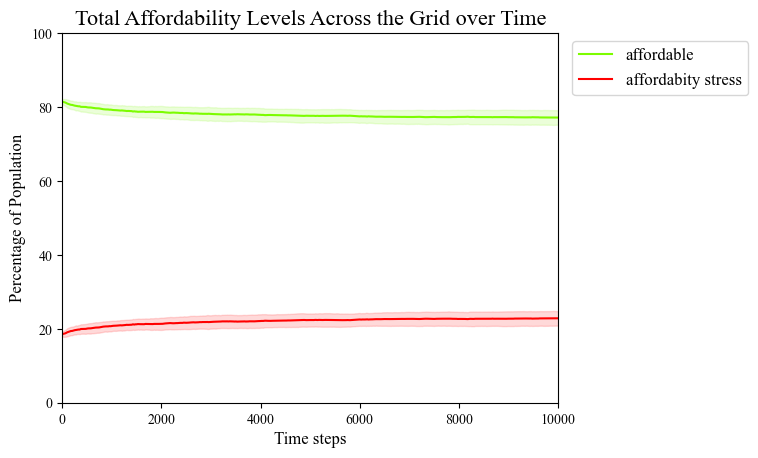

In [6]:
graph_grid_wide_affordability(vector, MaxIter)

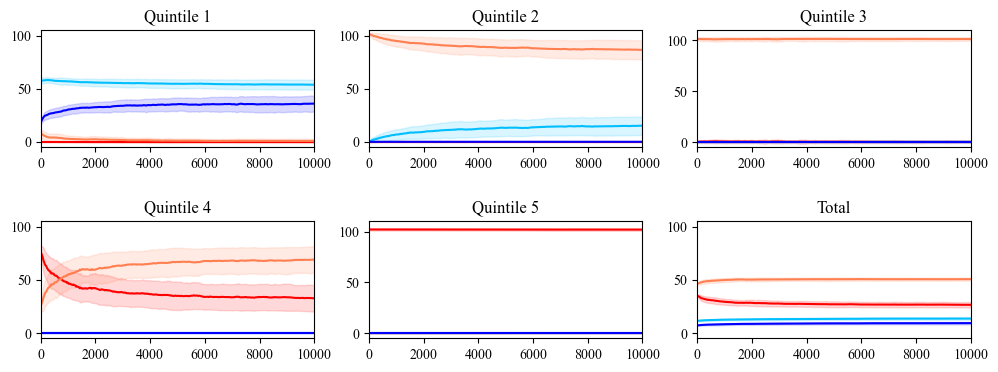

In [82]:
def graph_aff_by_quint_over_time(vector, MaxIter, setting):
    aff_by_quint = get_specific_data(vector, 1, num_runs)
    populations = get_specific_data(vector, 11, num_runs)
    x = []
    for i in range(MaxIter):
        if i%25 == 0:
            x.append(i)
            
    plt.figure(figsize=(12, 4))
    plot1 = plt.subplot2grid((5, 3), (0, 0), rowspan=2, colspan=1)
    plot2 = plt.subplot2grid((5, 3), (0, 1), rowspan=2, colspan=1)
    plot3 = plt.subplot2grid((5, 3), (0, 2), rowspan=2, colspan=1)
    plot4 = plt.subplot2grid((5, 3), (3, 0), rowspan=2, colspan=1)
    plot5 = plt.subplot2grid((5, 3), (3, 1), rowspan=2, colspan=1)
    plot6 = plt.subplot2grid((5, 3), (3, 2), rowspan=2, colspan=1)
            
    colours = ["red", "coral", "deepskyblue", "blue"]
    labels = ["under 2%", "under 5%", 'over 5%', "over 10%"]
                 
    if setting[0] == 0:
        
        for aff_level in range(4):
            high_line = [[] for _ in range(6)]
            mean_line = [[] for _ in range(6)]
            low_line = [[] for _ in range(6)]       
            for t in range(len(x)):
                for q in range(5):
                    vals = []
                    total = 0
                    
                    for run_index in range(len(aff_by_quint)):
                        run = aff_by_quint[run_index]
                        if aff_level == 4:
                            total += (run[t][q][aff_level] + run[t][q][5] + run[t][q][6])
                            vals.append(run[t][q][aff_level] + run[t][q][5] + run[t][q][6])
                        else:
                            total += run[t][q][aff_level]
                            vals.append(run[t][q][aff_level])
                    
                    mean = total / len(aff_by_quint)
                    std_dev = np.std(vals)
                    mean_norm = mean / (populations[run_index] / 5) * 100
                    high_norm = (mean + std_dev) / (populations[run_index] / 5) * 100
                    low_norm = (mean - std_dev) / (populations[run_index] / 5) * 100
                    mean_line[q].append(mean_norm)
                    high_line[q].append(high_norm)
                    low_line[q].append(low_norm)

            plot1.plot(x, mean_line[0], label=labels[aff_level], color=colours[aff_level], linestyle="solid")
            plot2.plot(x, mean_line[1], color=colours[aff_level], linestyle="solid")
            plot3.plot(x, mean_line[2], color=colours[aff_level], linestyle="solid")
            plot4.plot(x, mean_line[3], color=colours[aff_level], linestyle="solid")
            plot5.plot(x, mean_line[4], color=colours[aff_level], linestyle="solid")
            plot1.fill_between(x, high_line[0], low_line[0], color=colours[aff_level], alpha=0.15)
            plot2.fill_between(x, high_line[1], low_line[1], color=colours[aff_level], alpha=0.15)
            plot3.fill_between(x, high_line[2], low_line[2], color=colours[aff_level], alpha=0.15)
            plot4.fill_between(x, high_line[3], low_line[3], color=colours[aff_level], alpha=0.15)
            plot5.fill_between(x, high_line[4], low_line[4], color=colours[aff_level], alpha=0.15)
    
    mean_line_6 = [[], [], [], []]
    high_line_6 = [[], [], [], []]
    low_line_6 = [[], [], [], []]
    for t in range(len(x)):
        means = [0, 0, 0, 0]
        stds = [[], [], [], []]
        for run_index in range(len(aff_by_quint)):
            run = aff_by_quint[run_index]
            totals = [0, 0, 0, 0]
            for q in range(5):
                for aff_level in range(3):
                    totals[aff_level] += run[t][q][aff_level]
                totals[3] += run[t][q][3] + run[t][q][4] + run[t][q][5]
            for aff_level in range(4):
                means[aff_level] += totals[aff_level] /populations[run_index] * 100
                stds[aff_level].append(totals[aff_level] /populations[run_index] * 100)
        for aff_level in range(4):
            mean = means[aff_level] / len(aff_by_quint)
            std = np.std(stds[aff_level])
            mean_line_6[aff_level].append(mean)
            high_line_6[aff_level].append(mean + std)
            low_line_6[aff_level].append(mean - std)
    for aff_level in range(4):
        plot6.plot(x, mean_line_6[aff_level], label=labels[aff_level], color=colours[aff_level], linestyle="solid")
        plot6.fill_between(x, high_line_6[aff_level], low_line_6[aff_level], color=colours[aff_level], alpha=0.15)

    plot1.set_title("Quintile 1")
    plot2.set_title("Quintile 2")
    plot3.set_title("Quintile 3")
    plot4.set_title("Quintile 4")
    plot5.set_title("Quintile 5")
    plot6.set_title("Total")
    plot1.set_xlim(0, MaxIter)
    plot2.set_xlim(0, MaxIter)
    plot3.set_xlim(0, MaxIter)
    plot4.set_xlim(0, MaxIter)
    plot5.set_xlim(0, MaxIter)
    plot6.set_xlim(0, MaxIter)
    plot1.set_ylim(-5, 105)
    plot2.set_ylim(-5, 105)
    plot3.set_ylim(-5, 110)
    plot4.set_ylim(-5, 105)
    plot5.set_ylim(-5, 110)
    plot6.set_ylim(-5, 105)
    #plot1.legend(bbox_to_anchor=(1, 1.35), ncol=4, fontsize=12)
    plt.show()


setting = (0, 4)
#setting (0, any) = plot means and confidence intervals
#setting (1, any) = plot means only
#setting (2, q) = plot mean and confidence interval for quintile q only
graph_aff_by_quint_over_time(vector, MaxIter, setting)

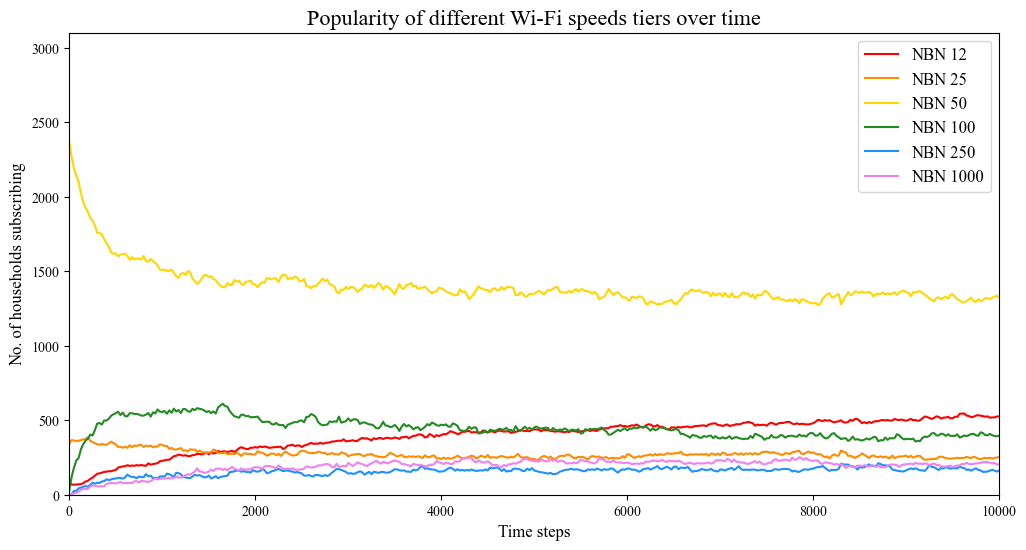

In [29]:
setting = (1, 4)
#setting (0, any) = plot means and confidence intervals
#setting (1, any) = plot means only
#setting (2, t) = plot mean and confidence interval for tier t only
graph_subs_over_time(vector, MaxIter, setting)

In [144]:
pripes = get_specific_data(vector, 6, num_runs)

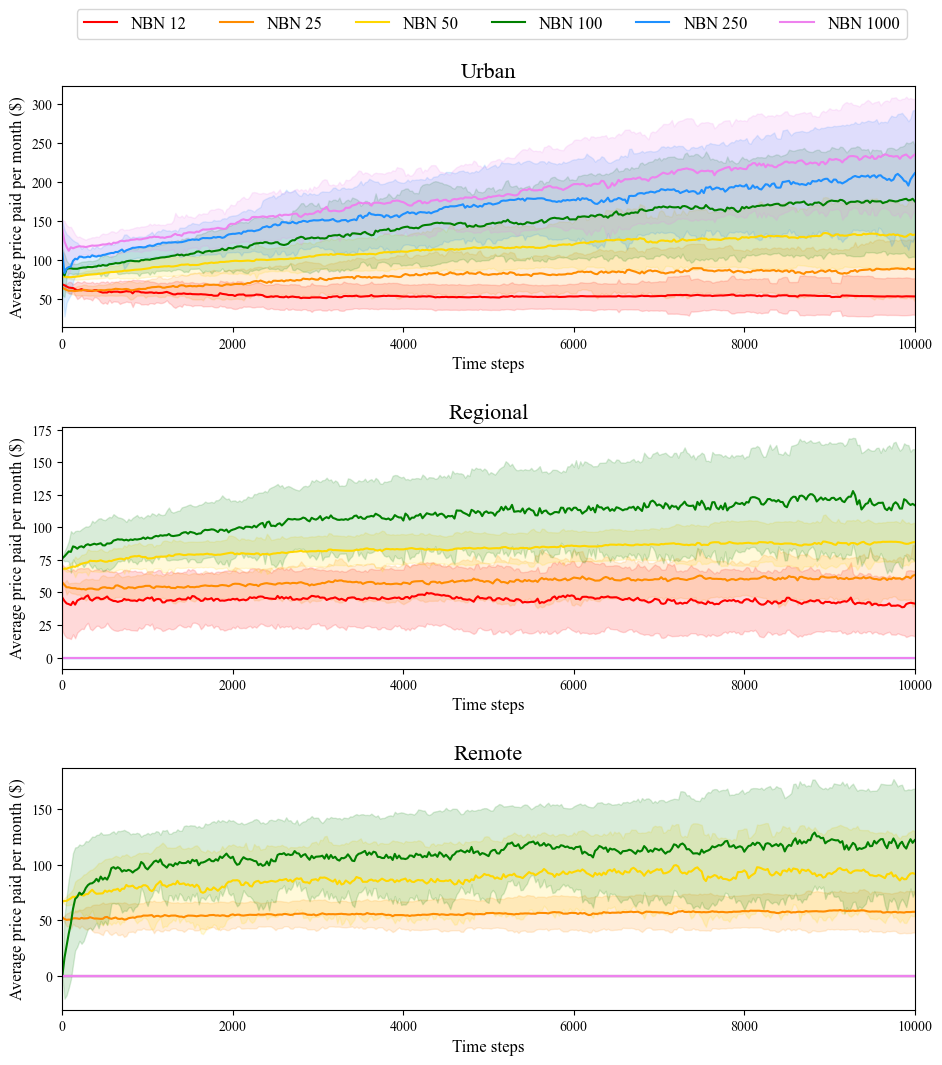

In [10]:
setting = (0, 4)
#setting (0, any) = plot means and confidence intervals
#setting (1, any) = plot means only
#setting (2, t) = plot mean and confidence interval for tier t only
graph_wifi_prices_over_time_per_ra(vector, MaxIter, setting)

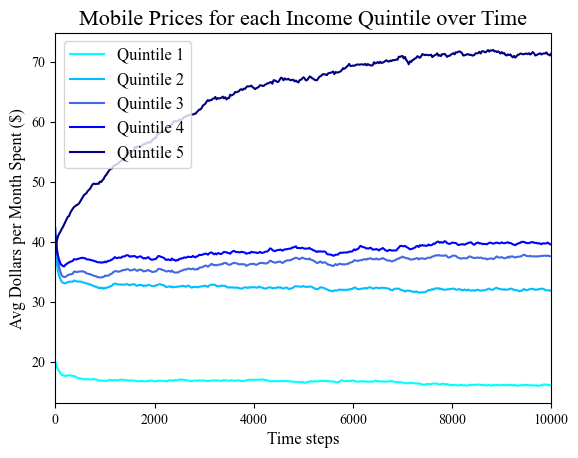

In [47]:
setting = 1
#setting 0 = plot means and confidence intervals
#setting 1 = plot means only  
graph_mobile_quintile_prices_over_time(vector, MaxIter, setting)

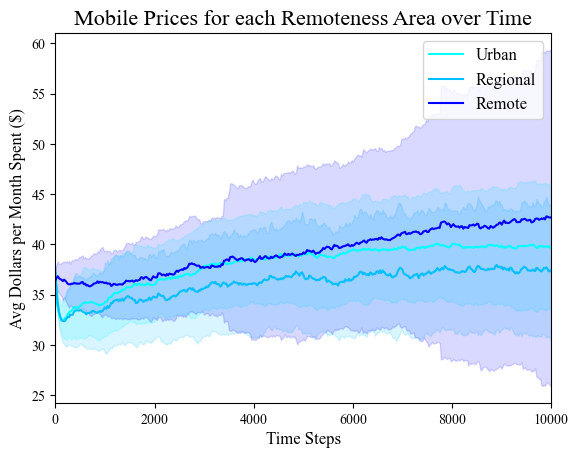

In [12]:
setting = 0
#setting 0 = plot means and confidence intervals
#setting 1 = plot means only  
graph_mobile_ra_prices_over_time(vector, MaxIter, setting)

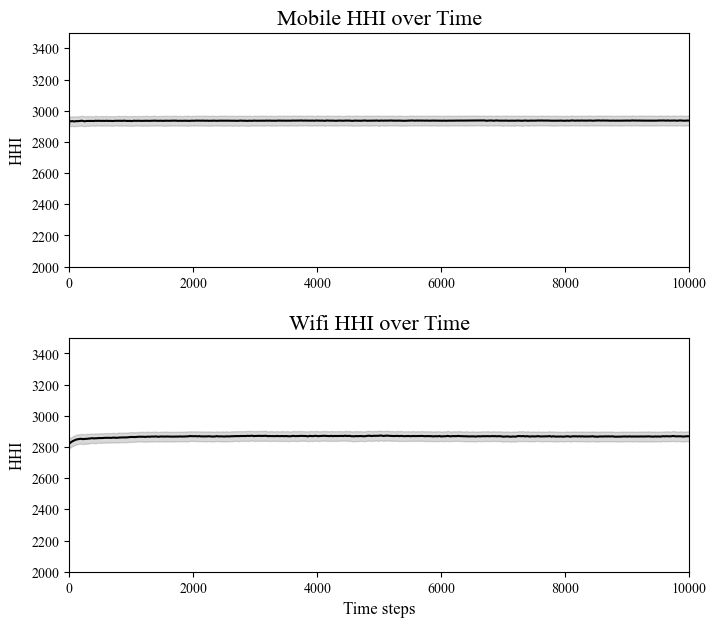

In [13]:
graph_HHIs(vector, MaxIter)

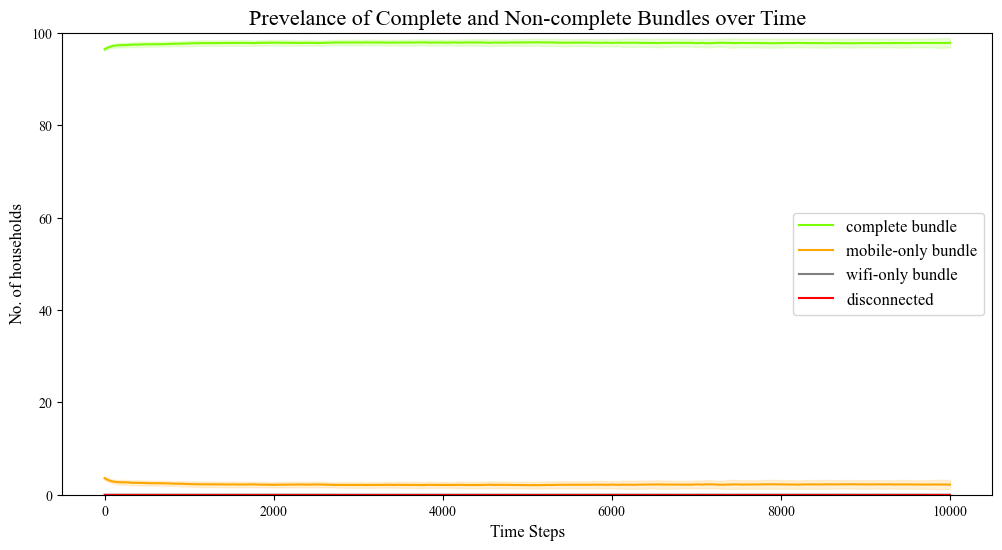

In [14]:
graph_all_bundle_types(vector, MaxIter)

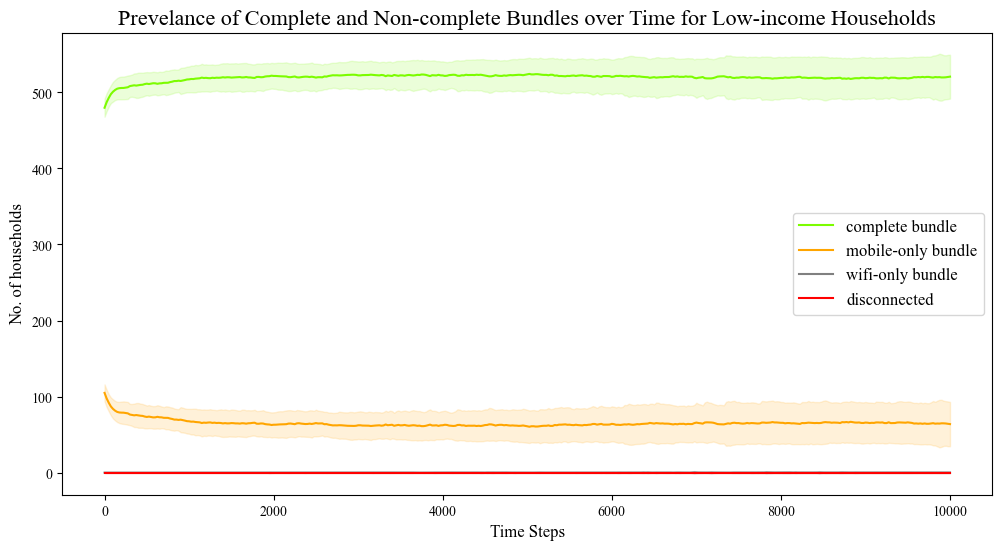

In [15]:
graph_q1_bundle_types(vector, MaxIter)

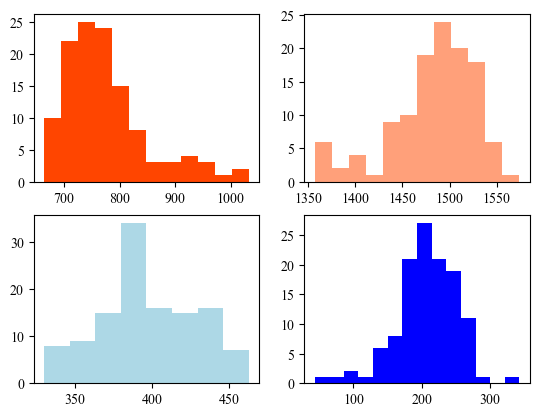

In [16]:
timestep = MaxIter-1
check_if_total_aff_norm_dist(vector, timestep)

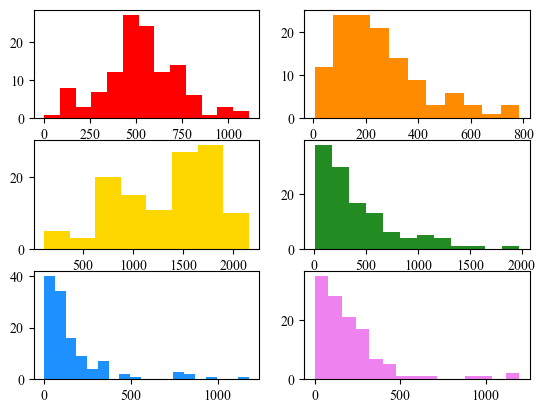

In [17]:
timestep = MaxIter-1
check_if_subs_norm_dist(vector, timestep)

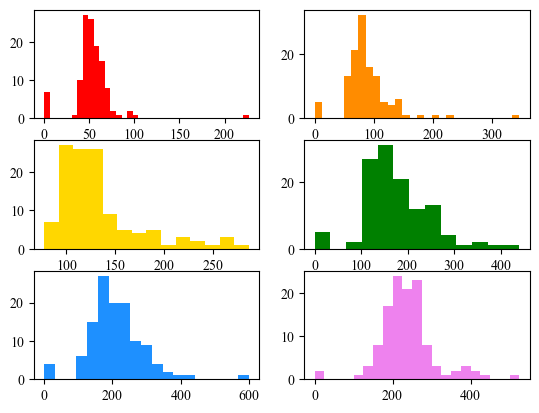

In [18]:
timestep = MaxIter-1
ra = 0
check_if_wifi_price_norm_dist(vector, ra, timestep)

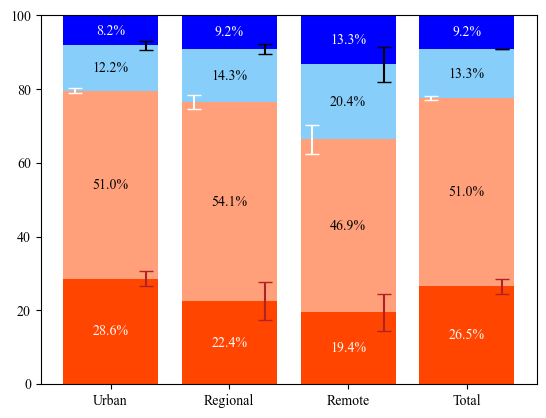

In [92]:
timestep = MaxIter-1
graph_aff_by_ra_run_avg_with_err(vector, timestep)

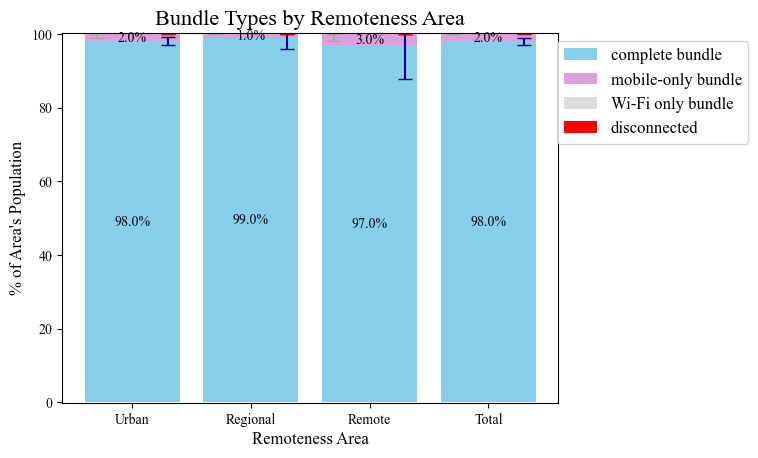

In [21]:
timestep = MaxIter-1
graph_bundles_by_ra(vector, timestep)

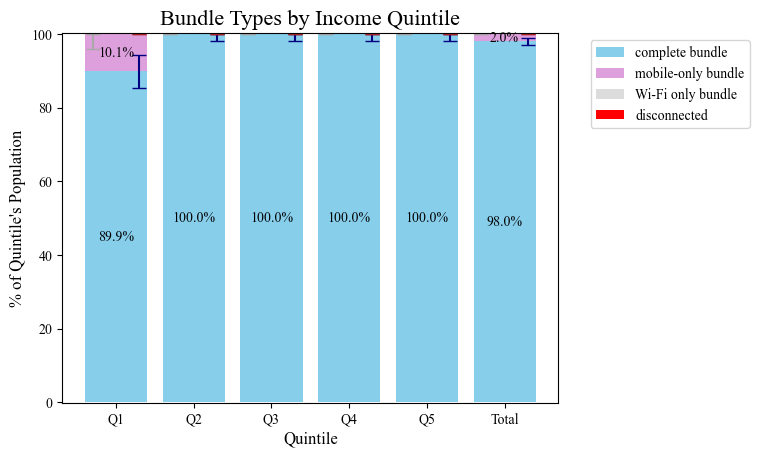

In [22]:
timestep = MaxIter-1
graph_bundles_by_quintile(vector, timestep)

# Thesis stats

In [5]:
'''Enter the number corresponding to the data element you want for the funtion below.
0 - profit_changes
1 - affordability_by_quintile
2 - affordability_by_RA 
3 - bundle types by quintile
4 - bundle types by RA
5 - subs per service 
6 - wifi price by RA
7 - mobile price by RA
8 - mobile price by quintile
9 - HHIs
10 - nbn revenue
11 - total population
'''
vector = 40
MaxIter = 16001
num_runs = 40
#data1 = get_specific_data(vector, element, runs)

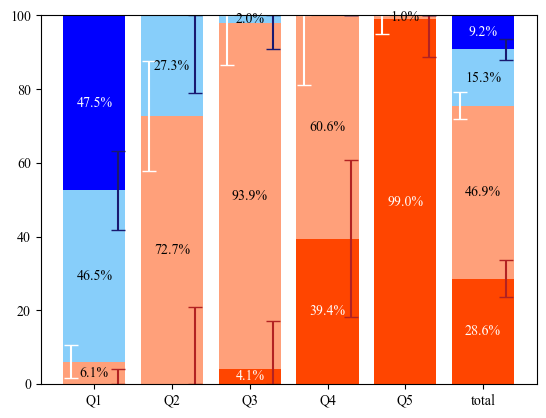

In [6]:
timestep = MaxIter-1
graph_aff_by_quint_run_avg_with_err(vector, timestep)

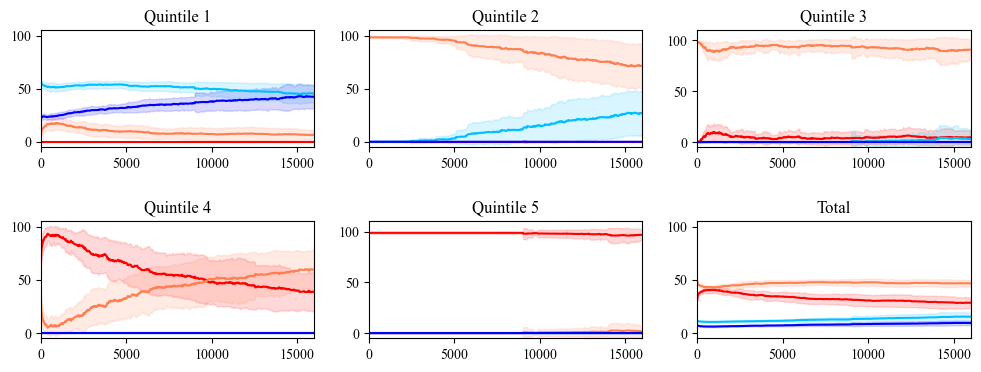

In [7]:
def graph_aff_by_quint_over_time(vector, MaxIter, setting):
    aff_by_quint = get_specific_data(vector, 1, num_runs)
    populations = get_specific_data(vector, 11, num_runs)
    x = []
    for i in range(MaxIter):
        if i%25 == 0:
            x.append(i)
            
    plt.figure(figsize=(12, 4))
    plot1 = plt.subplot2grid((5, 3), (0, 0), rowspan=2, colspan=1)
    plot2 = plt.subplot2grid((5, 3), (0, 1), rowspan=2, colspan=1)
    plot3 = plt.subplot2grid((5, 3), (0, 2), rowspan=2, colspan=1)
    plot4 = plt.subplot2grid((5, 3), (3, 0), rowspan=2, colspan=1)
    plot5 = plt.subplot2grid((5, 3), (3, 1), rowspan=2, colspan=1)
    plot6 = plt.subplot2grid((5, 3), (3, 2), rowspan=2, colspan=1)
            
    colours = ["red", "coral", "deepskyblue", "blue"]
    labels = ["under 2%", "under 5%", 'over 5%', "over 10%"]
                 
    if setting[0] == 0:
        
        for aff_level in range(4):
            high_line = [[] for _ in range(6)]
            mean_line = [[] for _ in range(6)]
            low_line = [[] for _ in range(6)]       
            for t in range(len(x)):
                for q in range(5):
                    vals = []
                    total = 0
                    
                    for run_index in range(len(aff_by_quint)):
                        run = aff_by_quint[run_index]
                        if aff_level == 4:
                            total += (run[t][q][aff_level] + run[t][q][5] + run[t][q][6])
                            vals.append(run[t][q][aff_level] + run[t][q][5] + run[t][q][6])
                        else:
                            total += run[t][q][aff_level]
                            vals.append(run[t][q][aff_level])
                    
                    mean = total / len(aff_by_quint)
                    std_dev = np.std(vals)
                    mean_norm = mean / (populations[run_index] / 5) * 100
                    high_norm = (mean + std_dev) / (populations[run_index] / 5) * 100
                    low_norm = (mean - std_dev) / (populations[run_index] / 5) * 100
                    mean_line[q].append(mean_norm)
                    high_line[q].append(high_norm)
                    low_line[q].append(low_norm)

            plot1.plot(x, mean_line[0], label=labels[aff_level], color=colours[aff_level], linestyle="solid")
            plot2.plot(x, mean_line[1], color=colours[aff_level], linestyle="solid")
            plot3.plot(x, mean_line[2], color=colours[aff_level], linestyle="solid")
            plot4.plot(x, mean_line[3], color=colours[aff_level], linestyle="solid")
            plot5.plot(x, mean_line[4], color=colours[aff_level], linestyle="solid")
            plot1.fill_between(x, high_line[0], low_line[0], color=colours[aff_level], alpha=0.15)
            plot2.fill_between(x, high_line[1], low_line[1], color=colours[aff_level], alpha=0.15)
            plot3.fill_between(x, high_line[2], low_line[2], color=colours[aff_level], alpha=0.15)
            plot4.fill_between(x, high_line[3], low_line[3], color=colours[aff_level], alpha=0.15)
            plot5.fill_between(x, high_line[4], low_line[4], color=colours[aff_level], alpha=0.15)
    
    mean_line_6 = [[], [], [], []]
    high_line_6 = [[], [], [], []]
    low_line_6 = [[], [], [], []]
    for t in range(len(x)):
        means = [0, 0, 0, 0]
        stds = [[], [], [], []]
        for run_index in range(len(aff_by_quint)):
            run = aff_by_quint[run_index]
            totals = [0, 0, 0, 0]
            for q in range(5):
                for aff_level in range(3):
                    totals[aff_level] += run[t][q][aff_level]
                totals[3] += run[t][q][3] + run[t][q][4] + run[t][q][5]
            for aff_level in range(4):
                means[aff_level] += totals[aff_level] /populations[run_index] * 100
                stds[aff_level].append(totals[aff_level] /populations[run_index] * 100)
        for aff_level in range(4):
            mean = means[aff_level] / len(aff_by_quint)
            std = np.std(stds[aff_level])
            mean_line_6[aff_level].append(mean)
            high_line_6[aff_level].append(mean + std)
            low_line_6[aff_level].append(mean - std)
    for aff_level in range(4):
        plot6.plot(x, mean_line_6[aff_level], label=labels[aff_level], color=colours[aff_level], linestyle="solid")
        plot6.fill_between(x, high_line_6[aff_level], low_line_6[aff_level], color=colours[aff_level], alpha=0.15)

    plot1.set_title("Quintile 1")
    plot2.set_title("Quintile 2")
    plot3.set_title("Quintile 3")
    plot4.set_title("Quintile 4")
    plot5.set_title("Quintile 5")
    plot6.set_title("Total")
    plot1.set_xlim(0, MaxIter)
    plot2.set_xlim(0, MaxIter)
    plot3.set_xlim(0, MaxIter)
    plot4.set_xlim(0, MaxIter)
    plot5.set_xlim(0, MaxIter)
    plot6.set_xlim(0, MaxIter)
    plot1.set_ylim(-5, 105)
    plot2.set_ylim(-5, 105)
    plot3.set_ylim(-5, 110)
    plot4.set_ylim(-5, 105)
    plot5.set_ylim(-5, 110)
    plot6.set_ylim(-5, 105)
    #plot1.legend(bbox_to_anchor=(1, 1.35), ncol=4, fontsize=12)
    plt.show()


setting = (0, 4)
#setting (0, any) = plot means and confidence intervals
#setting (1, any) = plot means only
#setting (2, q) = plot mean and confidence interval for quintile q only
graph_aff_by_quint_over_time(vector, MaxIter, setting)

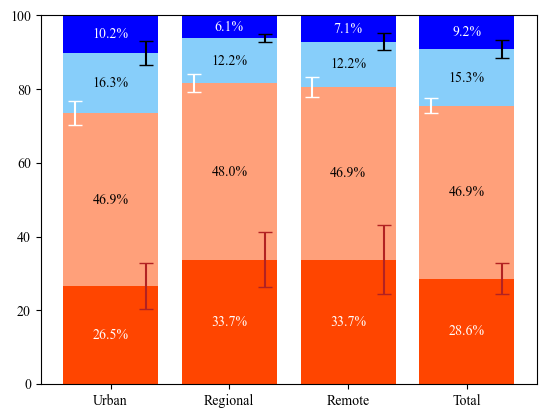

In [8]:
timestep = MaxIter-1
graph_aff_by_ra_run_avg_with_err(vector, timestep)

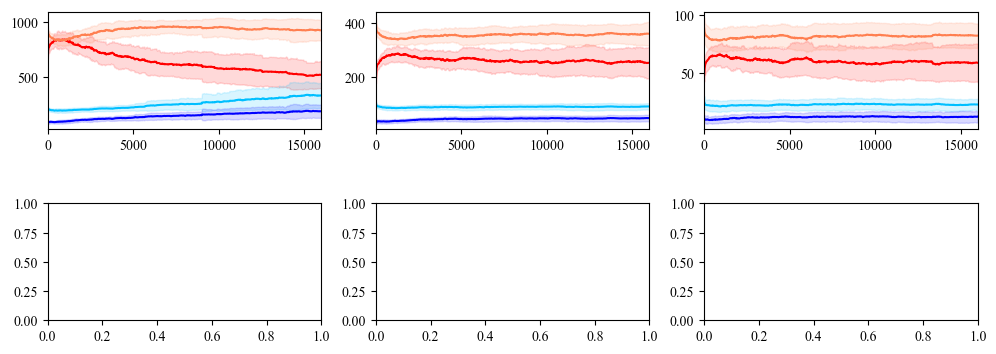

In [9]:
setting = (0, 4)
#setting (0, any) = plot means and confidence intervals
#setting (1, any) = plot means only
#setting (2, r) = plot mean and confidence interval for RA r only
graph_aff_by_ra_over_time(vector, MaxIter, setting)

In [10]:
bunds = get_specific_data(vector, 4, num_runs)

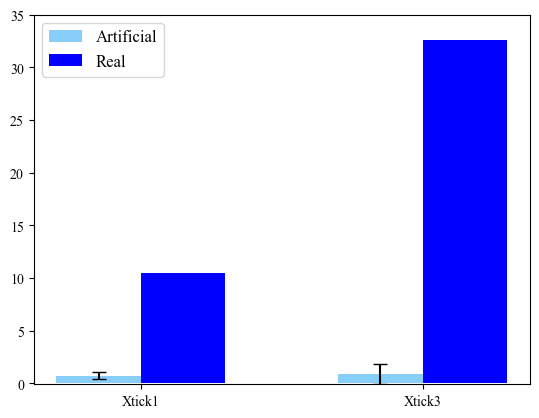

In [11]:
def graph_mobile_only_by_ra(vector, eq_start):
    bundles_by_ra = bunds
    
    x = ["Urban", "Regional", "Remote", "Total"]
    reals = []
    avgs = [0, 0, 0, 0]
    stds = [0, 0, 0, 0]
    vals = [[], [], [], []]
    
    pops_by_ra = [0, 0, 0, 0]
    for ra in range(3):
        pops_by_ra[ra] = sum(bundles_by_ra[0][0][ra])
    pops_by_ra[3] = pops_by_ra[2] + pops_by_ra[1] + pops_by_ra[0]
    
    eq_start = eq_start // 25
    for run in bundles_by_ra:
        avgs_over_t = [0, 0, 0, 0]
        stds_over_t = [0, 0, 0, 0]
        vals_over_t = [[], [], [], []]
        for t in range(eq_start, len(run)):
            total_col = 0
            for ra in range(3):
                avgs_over_t[ra] += run[t][ra][1]
                vals_over_t[ra].append(run[t][ra][1])
                total_col += run[t][ra][1]
            avgs_over_t[3] += total_col
            vals_over_t[3].append(total_col)
        for ra in range(4):
            avgs_over_t[ra] = avgs_over_t[ra] / (len(run) - eq_start)
            stds_over_t[ra] = np.std(vals_over_t[ra]) 
        for ra in range(4):
            normed_by_pop = avgs_over_t[ra] / pops_by_ra[ra] * 100
            avgs[ra] += normed_by_pop
            vals[ra].append(normed_by_pop)
    for ra in range(4):
        avgs[ra] = avgs[ra] / len(bundles_by_ra) 
        stds[ra] = np.std(vals[ra])
        
    num_bars = 2
    artificial_bars = (avgs[3], avgs[2])
    artificial_error = (stds[3], stds[2])
    real_bars = (10.5, 32.6)
    x = np.arange(num_bars)
    width = 0.3
    plt.bar(x, artificial_bars, width, color="lightskyblue", label='Artificial')
    plt.bar(x + width, real_bars, width, color="blue", label='Real')
    plt.errorbar(x, artificial_bars, yerr=artificial_error, fmt='none', ecolor='black', capsize=5)

    

    #plt.bar(x, avgs, color="yellowgreen")
    #plt.errorbar(x, avgs, yerr=stds, fmt='none', ecolor='black', capsize=5)
    #plt.title("Bundle Types by Remoteness Area", fontsize=16)
    #plt.xlabel("Remoteness Area", fontsize=12)
    #plt.ylabel("percentage of households", fontsize=12)
    plt.ylim(-0.1, 35)
    plt.legend(loc="best", fontsize=12)
    plt.xticks(x + width / 2, ('Xtick1', 'Xtick3'))
    plt.show()
    
eq_start = 8000
graph_mobile_only_by_ra(vector, eq_start)

In [12]:
bunds2 = get_specific_data(vector, 3, num_runs)

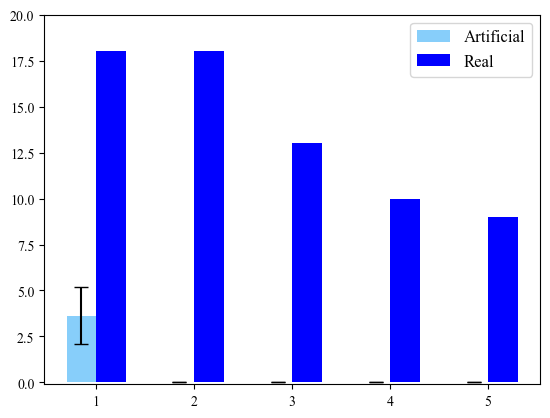

In [13]:
def graph_mobile_only_by_quint(vector, eq_start):
    bundles_by_quint = bunds2
    
    avgs = [0, 0, 0, 0, 0, 0]
    stds = [0, 0, 0, 0, 0, 0]
    vals = [[], [], [], [], [], []]
    
    pops_by_quint = [0, 0, 0, 0, 0, 0]
    for q in range(5):
        pops_by_quint[q] = sum(bundles_by_quint[0][0][q])
    pops_by_quint[5] = pops_by_quint[4] + pops_by_quint[3] + pops_by_quint[2] + pops_by_quint[1] + pops_by_quint[0]
    
    eq_start = eq_start // 25
    for run in bundles_by_quint:
        avgs_over_t = [0, 0, 0, 0, 0, 0]
        stds_over_t = [0, 0, 0, 0, 0, 0]
        vals_over_t = [[], [], [], [], [], []]
        for t in range(eq_start, len(run)):
            total_col = 0
            for q in range(5):
                avgs_over_t[q] += run[t][q][1]
                vals_over_t[q].append(run[t][q][1])
                total_col += run[t][q][1]
            avgs_over_t[5] += total_col
            vals_over_t[5].append(total_col)
        for q in range(6):
            avgs_over_t[q] = avgs_over_t[q] / (len(run) - eq_start)
            stds_over_t[q] = np.std(vals_over_t[q])
        for q in range(6):
            normed_by_pop = avgs_over_t[q] / pops_by_quint[q] * 100
            avgs[q] += normed_by_pop
            vals[q].append(normed_by_pop)
    for q in range(6):
        avgs[q] = avgs[q] / len(bundles_by_quint) 
        stds[q] = np.std(vals[q])
        
    num_bars = 5
    artificial_bars = avgs[:-1]
    artificial_error = stds[:-1]
    real_bars = (18, 18, 13, 10, 9)
    x = np.arange(num_bars)
    width = 0.3
    x_lables = ["Q1", "Q2", "Q3", "Q4", "Q5", "Total"]
    plt.bar(x, artificial_bars, width, color="lightskyblue", label='Artificial')
    plt.bar(x + width, real_bars, width, color="blue", label='Real')
    plt.errorbar(x, artificial_bars, yerr=artificial_error, fmt='none', ecolor='black', capsize=5)

    #plt.bar(x, avgs, color="yellowgreen")
    #plt.errorbar(x, avgs, yerr=stds, fmt='none', ecolor='black', capsize=5)
    #plt.title("Bundle Types by Remoteness Area", fontsize=16)
    #plt.xlabel("Remoteness Area", fontsize=12)
    #plt.ylabel("percentage of households", fontsize=12)
    plt.ylim(-0.1, 20)
    plt.legend(loc="best", fontsize=12)
    plt.xticks(x + width / 2, ('1', '2', '3', '4', '5'))
    plt.show()
    
eq_start = 8000
graph_mobile_only_by_quint(vector, eq_start)

In [14]:
pops = get_specific_data(vector, 11, num_runs)

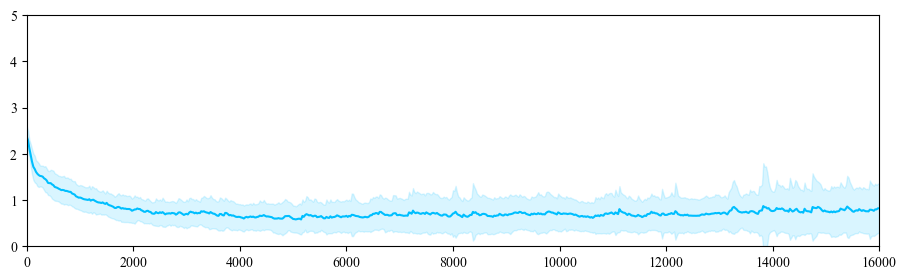

In [15]:
def graph_mobile_only_over_time(vector, MaxIter):
    bundle_types = bunds
    populations = pops
    x = []
    for i in range(MaxIter):
        if i%25 == 0:
            x.append(i)
    plt.figure(figsize=(11, 3)) 

    high = []
    means = []
    low = []       
    for t in range(len(x)):
        std_devs = []
        mean = 0
        for run_index in range(len(bundle_types)):
            run = bundle_types[run_index]
            total = 0
            for ra in range(3):
                total += run[t][ra][1]
            mean += (total / populations[run_index] * 100)
            std_devs.append(total / populations[run_index] * 100)
        mean = mean/len(bundle_types)
        std_dev = np.std(std_devs)
        means.append(mean)
        high.append(mean + std_dev)
        low.append(mean - std_dev)
    plt.plot(x, means, color="deepskyblue", linestyle="solid")
    plt.fill_between(x, high, low, color="deepskyblue", alpha=0.15)

    #plt.title("Prevelance of Complete and Non-complete Bundles over Time", fontsize=16)
    #plt.legend(fontsize=12)

    #plt.xlabel("Time Steps", fontsize=12)
    #plt.ylabel("No. of households", fontsize=12)
    plt.ylim(0, 5)
    plt.xlim(0, MaxIter)
    plt.show()
    
graph_mobile_only_over_time(vector, MaxIter)

In [16]:
subs_data = get_specific_data(vector, 5, num_runs)

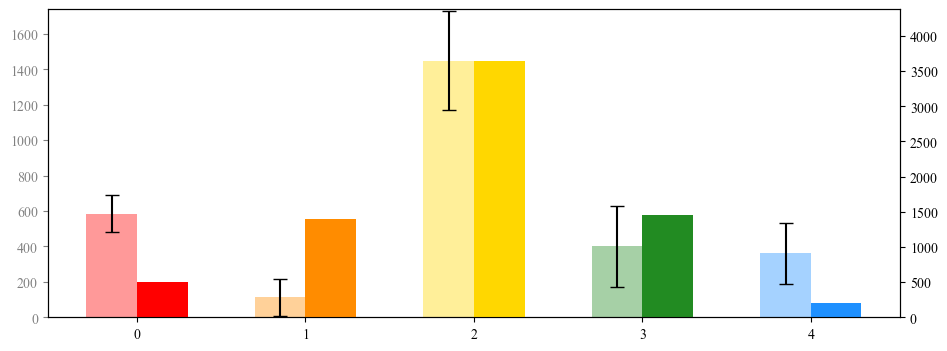

In [17]:
def graph_subs(vector, eq_start):
    subs = subs_data
    eq_start = eq_start // 25
    
    means = [0, 0, 0, 0, 0]
    stds = [0, 0, 0, 0, 0]
    for run in subs:
        avgs_over_t = [0, 0, 0, 0, 0]
        stds_over_t = [0, 0, 0, 0, 0]
        vals_over_t = [[], [], [], [], []]
        for t in range(eq_start, len(run)):
            for speed in range(4):  
                avgs_over_t[speed] += run[t][speed]
                vals_over_t[speed].append(run[t][speed])
            avgs_over_t[4] += run[t][4] + run[t][5]
            vals_over_t[4].append(run[t][4] + run[t][5])
        for speed in range(5):
            avgs_over_t[speed] = avgs_over_t[speed] / (len(run) - eq_start)
            stds_over_t[speed] = np.std(vals_over_t[speed]) 
            means[speed] += avgs_over_t[speed]
            stds[speed] += stds_over_t[speed]
    for speed in range(5):
        means[speed] = means[speed] / len(subs)
        stds[speed] = stds[speed] / len(subs)
    artificial = means
    artificial_error = stds
    real = (500, 1400, 3650, 1450, 200)
    labels = ["Artificial  Real    ", "Artificial  Real    ", "Artificial  Real    ", "Artificial  Real    ", "Artificial  Real    "]
    colours = ["red", "darkorange", "gold", "forestgreen", "dodgerblue", "violet"]
    num_bars = 5
    x = np.arange(num_bars)
    width = 0.3
    
    fig, ax1 = plt.subplots(figsize=(11, 4))

    bars1 = ax1.bar(x - width/2, artificial, width, color=colours, label='Artificial', alpha=0.4)
    ax1.errorbar(x - width/2, artificial, yerr=artificial_error, fmt='none', ecolor='black', capsize=5)
    #ax1.set_ylabel('No. of Artificial Subscribers', fontsize=12)
    ax1.set_ylim(0, max(artificial) * 1.2)

    ax2 = ax1.twinx()
    bars2 = ax2.bar(x + width/2, real, width, color=colours, label='Real')
    #ax2.set_ylabel('No. of Real Subscribers', fontsize=12)
    ax2.set_ylim(0, max(real) * 1.2)

    ax1.set_xticks(x)
    #ax1.set_xticklabels(labels)
    
    # Change the colors of the axis ticks
    ax1.tick_params(axis='y', colors="grey")
    ax2.tick_params(axis='y', colors="black")
    ax1.yaxis.label.set_color("grey")
    ax2.yaxis.label.set_color("black")

    plt.show()

eq_start = 8000
graph_subs(vector, eq_start)

In [18]:
subbies = get_specific_data(vector, 5, num_runs)

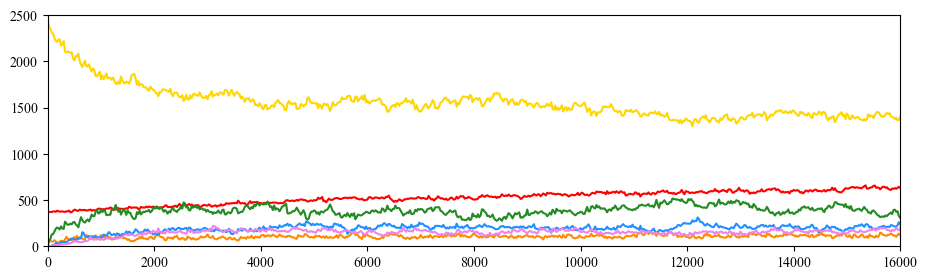

In [19]:
def graph_subs_over_time(vector, MaxIter, setting):
    subs = subbies
    x = []
    for i in range(MaxIter):
        if i%25 == 0:
            x.append(i)
    plt.figure(figsize=(11, 3)) 
    colours = ["red", "darkorange", "gold", "forestgreen", "dodgerblue", "violet"]
    labels = ["NBN 12", "NBN 25", "NBN 50", "NBN 100", "NBN 250", "NBN 1000"]
    
    if setting[0] == 0:

        for tier in range(6):
            high = []
            means = []
            low = []       
            for t in range(len(x)):
                std_devs = []
                mean = 0
                for run in subs:
                    mean += run[t][tier]
                    std_devs.append(run[t][tier])
                mean = mean/len(subs)
                std_dev = np.std(std_devs)
                means.append(mean)
                high.append(mean + std_dev)
                low.append(mean - std_dev)
            plt.plot(x, means, label=labels[tier], color=colours[tier], linestyle="solid")
            if tier == 2:
                plt.fill_between(x, high, low, color=colours[tier], alpha=0.15)
        
        #plt.title("Popularity of different Wi-Fi speeds tiers over time", fontsize=16)
        #plt.legend(bbox_to_anchor=(1, 1), fontsize=12)
            
    if setting[0] == 1:
        
        for tier in range(6):
            means = []  
            for t in range(len(x)):
                mean = 0
                for run in subs:
                    mean += run[t][tier]
                mean = mean/len(subs)
                means.append(mean)
            plt.plot(x, means, label=labels[tier], color=colours[tier], linestyle="solid")
        
        #plt.title("Popularity of different Wi-Fi speeds tiers over time", fontsize=16)
        #plt.legend(bbox_to_anchor=(1, 1.15), ncol=6, fontsize=12)

    
    plt.ylim(0, 2500)
    plt.xlim(0, MaxIter)
    #plt.xlabel("Time steps", fontsize=12)
    #plt.ylabel("No. of households subscribing", fontsize=12)
    plt.show()

setting = (1, 0)
graph_subs_over_time(vector, MaxIter, setting)

In [20]:
pripes = get_specific_data(vector, 6, num_runs)

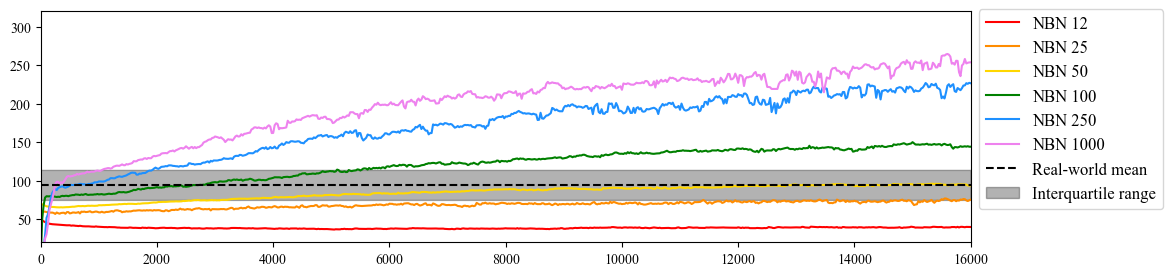

In [21]:
def graph_wifi_prices_over_time_grid_wide(vector, MaxIter, setting):
    plt.figure(figsize=(12, 3))

    prices = pripes
    x = []
    for i in range(MaxIter):
        if i%25 == 0:
            x.append(i)
        
    colours = ["red", "darkorange", "gold", "green", "dodgerblue", "violet"]
    labels = ["NBN 12", "NBN 25", "NBN 50", "NBN 100", "NBN 250", "NBN 1000"]
                 
    if setting[0] == 0:
        
        for tier in range(6):
            high_line = []
            mean_line = []
            low_line = []       
            
            for t in range(len(x)):
                std_devs = []
                mean = 0
                for run in prices:
                    num = 0
                    avg = 0
                    for ra in range(3):
                        if run[t][ra][tier] > 0:
                            avg += run[t][ra][tier]
                            num += 1
                    if num != 0:
                        avg = avg / num
                    std_devs.append(avg)   
                    mean += avg
                
                mean = mean / len(prices)
                std_dev = np.std(std_devs)
                mean_line.append(mean)
                high_line.append(mean + std_dev)
                low_line.append(mean - std_dev)
                        
            plt.plot(x, mean_line, label=labels[tier], color=colours[tier], linestyle="solid")
            plt.fill_between(x, high_line, low_line, color=colours[tier], alpha=0.15)
        
    elif setting[0] == 1:

        for tier in range(6):
            mean_line = [] 
            
            for t in range(len(x)):
                mean = 0
                for run in prices:
                    num = 0
                    avg = 0
                    for ra in range(3):
                        if run[t][ra][tier] > 0:
                            avg += run[t][ra][tier]
                            num += 1
                    if num != 0:
                        avg = avg / num
                    mean += avg
                
                mean = mean / len(prices)
                mean_line.append(mean)

            plt.plot(x, mean_line, label=labels[tier], color=colours[tier], linestyle="solid")
            
    real_mean = [95 for _ in range(len(x))]
    real_high = [114 for _ in  range(len(x))]
    real_low = [75 for _ in range(len(x))]
    plt.plot(x, real_mean, color="black", label="Real-world mean", linestyle="dashed")
    plt.fill_between(x, real_high, real_low, label="Interquartile range", color="black", alpha=0.3)

    #plt.title("Average Prices Paid per NBN Speed Tier over Time", fontsize=16)
    #plt.xlabel("Time steps", fontsize=12)
    #plt.ylabel("Average price paid per month ($)", fontsize=12)
    plt.xlim(0, MaxIter)
    plt.ylim(20, 320)
    plt.legend(bbox_to_anchor=(1, 1.045), fontsize=12)
    plt.show()


setting = (1, 4)
#setting (0, any) = plot means and confidence intervals
#setting (1, any) = plot means only
#setting (2, t) = plot mean and confidence interval for tier t only
graph_wifi_prices_over_time_grid_wide(vector, MaxIter, setting)

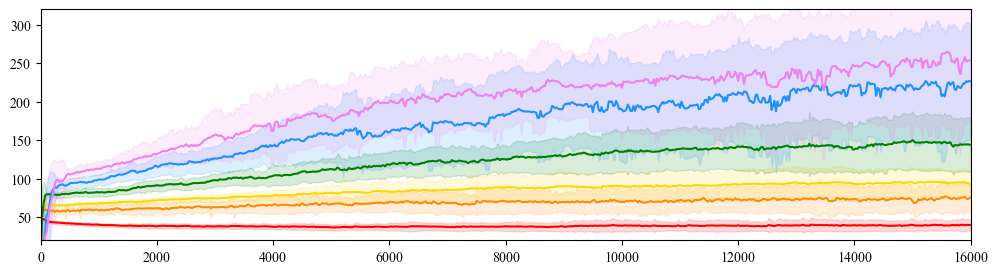

In [22]:
def graph_wifi_prices_over_time_grid_wide(vector, MaxIter, setting):
    plt.figure(figsize=(12, 3))

    prices = pripes
    x = []
    for i in range(MaxIter):
        if i%25 == 0:
            x.append(i)
            
    colours = ["red", "darkorange", "gold", "green", "dodgerblue", "violet"]
    labels = ["NBN 12", "NBN 25", "NBN 50", "NBN 100", "NBN 250", "NBN 1000"]
                 
    if setting[0] == 0:
        
        for tier in range(6):
            high_line = []
            mean_line = []
            low_line = []       
            
            for t in range(len(x)):
                std_devs = []
                mean = 0
                for run in prices:
                    num = 0
                    avg = 0
                    for ra in range(3):
                        if run[t][ra][tier] > 0:
                            avg += run[t][ra][tier]
                            num += 1
                    if num != 0:
                        avg = avg / num
                    std_devs.append(avg)   
                    mean += avg
                
                mean = mean / len(prices)
                std_dev = np.std(std_devs)
                mean_line.append(mean)
                high_line.append(mean + std_dev)
                low_line.append(mean - std_dev)
                        
            plt.plot(x, mean_line, label=labels[tier], color=colours[tier], linestyle="solid")
            plt.fill_between(x, high_line, low_line, color=colours[tier], alpha=0.15)
        
    elif setting[0] == 1:

        for tier in range(6):
            mean_line = []      
            
            for t in range(len(x)):
                mean = 0
                for run in prices:
                    num = 0
                    avg = 0
                    for ra in range(3):
                        avg += run[t][ra][tier]
                        num += 1
                    if num != 0:
                        avg = avg / num 
                    mean_final += avg
                
                mean = mean / len(prices)
                mean_line.append(mean)
                        
            plt.plot(x, mean_line, label=labels[tier], color=colours[tier], linestyle="solid")

    #plt.title("Average Prices Paid per NBN Speed Tier over Time", fontsize=16)
    #plt.xlabel("Time steps", fontsize=12)
    #plt.ylabel("Average price paid per month ($)", fontsize=12)
    plt.xlim(0, MaxIter)
    plt.ylim(20, 320)
    #plt.legend(bbox_to_anchor=(1, 1.35), ncol=6, fontsize=12)
    plt.show()


setting = (0, 4)
#setting (0, any) = plot means and confidence intervals
#setting (1, any) = plot means only
#setting (2, t) = plot mean and confidence interval for tier t only
graph_wifi_prices_over_time_grid_wide(vector, MaxIter, setting)

In [23]:
mobs = get_specific_data(vector, 10, num_runs)

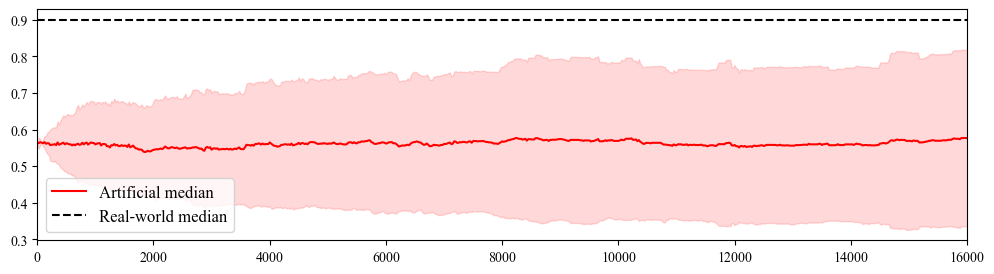

In [24]:
def graph_price_per_gb_over_time_grid_wide(vector, MaxIter, setting):
    plt.figure(figsize=(12, 3))

    prices = mobs
    x = []
    for i in range(MaxIter):
        if i%25 == 0:
            x.append(i)
     
    avg_per_gb = []
    low_per_gb = []
    high_per_gb = []
    for t in range(len(x)):
        avg_across_runs = []
        for run in prices:
            avg_across_runs.append(run[t])
        avg = sum(avg_across_runs) / len(avg_across_runs)
        std = np.std(avg_across_runs)
        avg_per_gb.append(avg)
        low_per_gb.append(avg - std)
        high_per_gb.append(avg + std)

    plt.plot(x, avg_per_gb, color="red", label="Artificial median", linestyle="solid")
    plt.fill_between(x, low_per_gb, high_per_gb, color="red", alpha=0.15)
    
    real_mean = [0.9 for _ in range(len(x))]
    plt.plot(x, real_mean, color="black", label="Real-world median", linestyle="dashed")

    #plt.title("Average Prices Paid per NBN Speed Tier over Time", fontsize=16)
    #plt.xlabel("Time steps", fontsize=12)
    #plt.ylabel("Average price paid per month ($)", fontsize=12)
    plt.xlim(0, MaxIter)
    #plt.ylim(20, 250)
    plt.legend(fontsize=12)
    plt.show()


setting = (1, 4)
#setting (0, any) = plot means and confidence intervals
#setting (1, any) = plot means only
#setting (2, t) = plot mean and confidence interval for tier t only
graph_price_per_gb_over_time_grid_wide(vector, MaxIter, setting)

In [25]:
hhi = get_specific_data(vector, 9, num_runs)

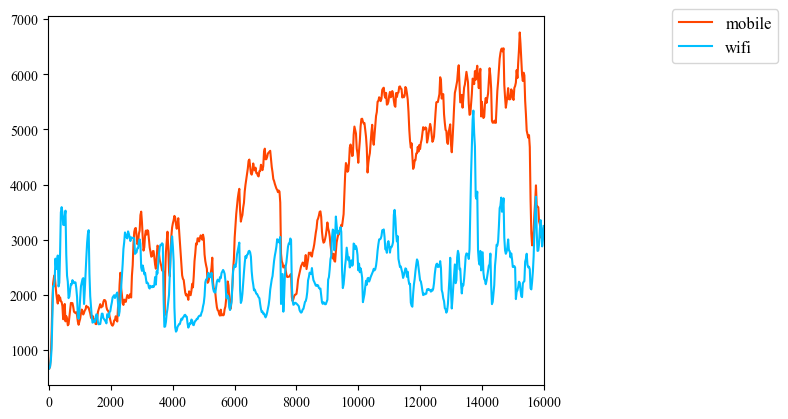

In [26]:
def graph_single_HHI(vector, MaxIter):
    HHIs = hhi[0]
    x = []
    for i in range(MaxIter):
        if i%25 == 0:
            x.append(i)
            
    mobiles = [HHIs[t][0] for t in range(len(x))]
    wifis = [HHIs[t][1] for t in range(len(x))]
    plt.plot(x, mobiles, color='orangered', label='mobile')
    plt.plot(x, wifis, color='deepskyblue', label='wifi')
    
    plt.legend(bbox_to_anchor=(1.49, 1.04), fontsize=12)
    plt.xlim(-50, MaxIter)
    plt.show()
    
graph_single_HHI(vector, MaxIter)

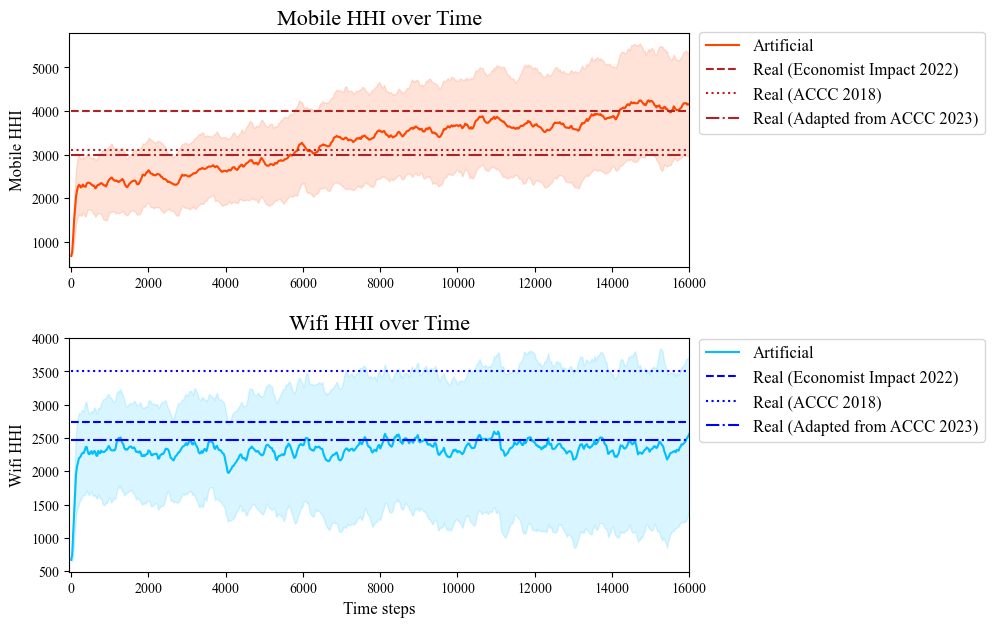

In [27]:
def graph_HHIs(vector, MaxIter):
    HHIs = hhi
    plt.figure(figsize=(8, 7))
    plot1 = plt.subplot2grid((9, 1), (0, 0), rowspan=4, colspan=1)
    plot2 = plt.subplot2grid((9, 1), (5, 0), rowspan=4, colspan=1)
    x = []
    for i in range(MaxIter):
        if i%25 == 0:
            x.append(i)
            
    mobile_means = []
    mobile_upper = []
    mobile_lower = []
    wifi_means = []
    wifi_upper = []
    wifi_lower = []
    for t in range(len(x)):
        mobile_mean = 0
        mobile_std_devs = []
        wifi_mean = 0
        wifi_std_devs = []
        for run in HHIs:
            mobile_mean += run[t][0]
            wifi_mean += run[t][1]
            mobile_std_devs.append(run[t][0])
            wifi_std_devs.append(run[t][0])
        mobile_mean = mobile_mean/len(HHIs)
        wifi_mean = wifi_mean/len(HHIs)
        mobile_std_dev = np.std(mobile_std_devs)
        wifi_std_dev = np.std(wifi_std_devs)
        
        mobile_means.append(mobile_mean)
        mobile_upper.append(mobile_mean + mobile_std_dev)
        mobile_lower.append(mobile_mean - mobile_std_dev)
        wifi_means.append(wifi_mean)
        wifi_upper.append(wifi_mean + wifi_std_dev)
        wifi_lower.append(wifi_mean - wifi_std_dev)
        
    shares = []
    with open("../data_files/market/isp_market_shares.csv", "r") as file:
        csvreader = csv.reader(file)
        header = next(csvreader)
        for row in csvreader:
            shares.append(row)
    totalm = 0
    totalw = 0
    for isp in shares:
        totalm += float(isp[2])**2
        totalw += float(isp[1])**2
    real_mobile1 = [4006 for _ in range(len(x))]
    real_wifi1 = [2742 for _ in range(len(x))]
    real_mobile2 = [3100 for _ in range(len(x))]
    real_wifi2 = [3500 for _ in range(len(x))]
    real_mobile3 = [totalm for _ in range(len(x))]
    real_wifi3 = [totalw for _ in range(len(x))]
    
    #plot 1 - mobile
    plot1.plot(x, mobile_means, color="orangered", label="Artificial", linestyle="solid")
    plot1.fill_between(x, mobile_lower, mobile_upper, color="orangered", alpha=0.15)
    plot1.plot(x, real_mobile1, color="firebrick", label="Real (Economist Impact 2022)", linestyle="dashed")
    plot1.plot(x, real_mobile2, color="firebrick", label="Real (ACCC 2018)", linestyle="dotted")
    plot1.plot(x, real_mobile3, color="firebrick", label="Real (Adapted from ACCC 2023)", linestyle="dashdot")
    
    #plot 2 - wifi 
    plot2.plot(x, wifi_means, color="deepskyblue", label="Artificial", linestyle="solid")
    plot2.fill_between(x, wifi_lower, wifi_upper, color="deepskyblue", alpha=0.15)
    plot2.plot(x, real_wifi1, color="blue", label="Real (Economist Impact 2022)", linestyle="dashed")
    plot2.plot(x, real_wifi2, color="blue", label="Real (ACCC 2018)", linestyle="dotted")
    plot2.plot(x, real_wifi3, color="blue", label="Real (Adapted from ACCC 2023)", linestyle="dashdot")


    plot2.set_xlabel("Time steps", fontsize=12)
    plot1.set_ylabel("Mobile HHI", fontsize=12)
    plot2.set_ylabel("Wifi HHI", fontsize=12)
    plot1.set_title("Mobile HHI over Time", fontsize=16)
    plot2.set_title("Wifi HHI over Time", fontsize=16)
    plot1.legend(bbox_to_anchor=(1.49, 1.04), fontsize=12)
    plot2.legend(bbox_to_anchor=(1.49, 1.03), fontsize=12)
    plot1.set_xlim(-50, MaxIter)
    plot2.set_xlim(-50, MaxIter)
    #plot1.set_ylim(2000, 4000)
    #plot2.set_ylim(2000, 4000)
    plt.show()
    
graph_HHIs(vector, MaxIter)

# Under the hood

In [52]:
'''Enter the number corresponding to the data element you want for the funtion below.
0 - profit_changes
1 - affordability_by_quintile
2 - affordability_by_RA 
3 - bundle types by quintile
4 - bundle types by RA
5 - subs per service 
6 - wifi price by RA
7 - mobile price by RA
8 - mobile price by quintile
9 - HHIs
10 - nbn revenue
11 - total population
'''
vector = 40
MaxIter = 16001
num_runs = 40
#data1 = get_specific_data(vector, element, runs)

In [35]:
timestep = MaxIter-1
graph_aff_by_quint_run_avg_with_err(vector, timestep)

TypeError: 'float' object is not subscriptable

In [ ]:
timestep = MaxIter-1
graph_aff_by_ra_run_avg_with_err(vector, timestep)

In [29]:
profies = get_specific_data(vector, 0, num_runs)[4]

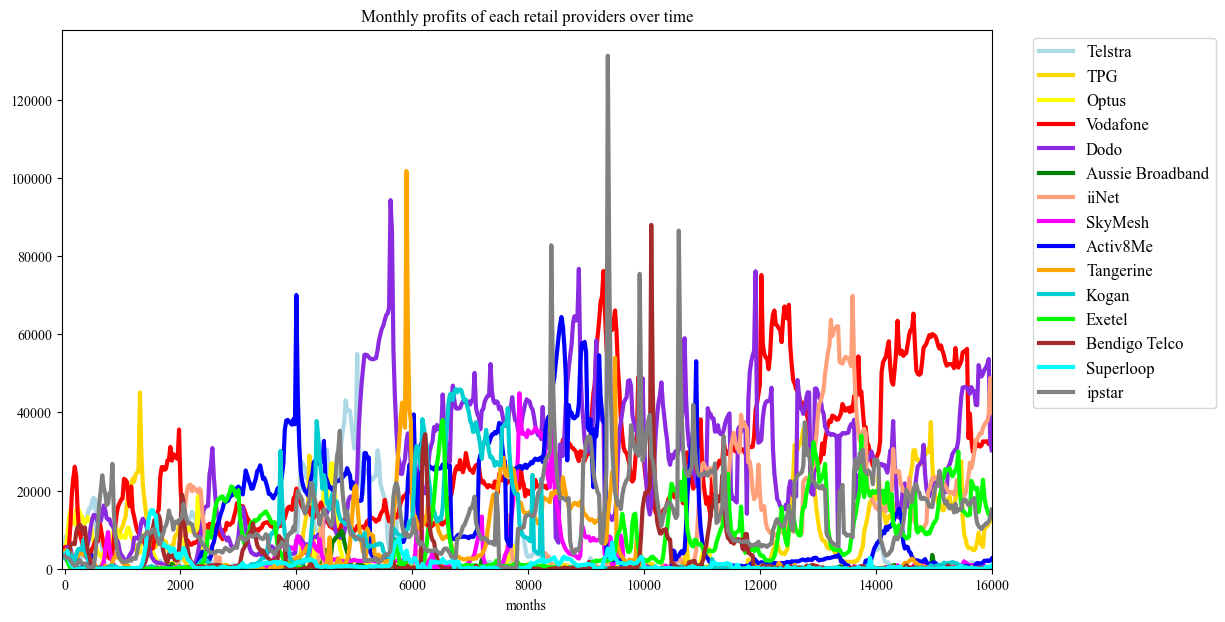

In [63]:
def graph_profit(vector, MaxIter):
    isp_profits = profies
    plt.figure(figsize=(12, 7))
    x = []
    for i in range(MaxIter):
        if i%25 == 0:
            x.append(i)
    ISPs = ["Telstra", "TPG", "Optus", "Vodafone", "Dodo", "Aussie Broadband", "iiNet", "SkyMesh", "Activ8Me", "Tangerine", "Kogan", "Exetel", "Bendigo Telco", "Superloop", "ipstar", "Moose Mobile" ]
    colours = ["lightblue", "gold", "yellow", "red", "blueviolet", "green", "lightsalmon", "fuchsia", "blue", "orange", "darkturquoise", "lime", "brown", "aqua", "grey", "peru"]
    for isp in range(len(isp_profits[:400])):
        plt.plot(x, isp_profits[isp], label=ISPs[isp], color=colours[isp], linewidth=3, linestyle="solid")
    plt.title("Monthly profits of each retail providers over time")
    plt.legend(bbox_to_anchor=(1.25, 1), loc="upper right", fontsize=12)
    plt.xlabel("months")
    plt.xlim(-50, MaxIter)
    plt.ylim(bottom=-1)
    plt.show()
    
graph_profit(vector, MaxIter)

In [31]:
all_profies = get_specific_data(vector, 0, num_runs)

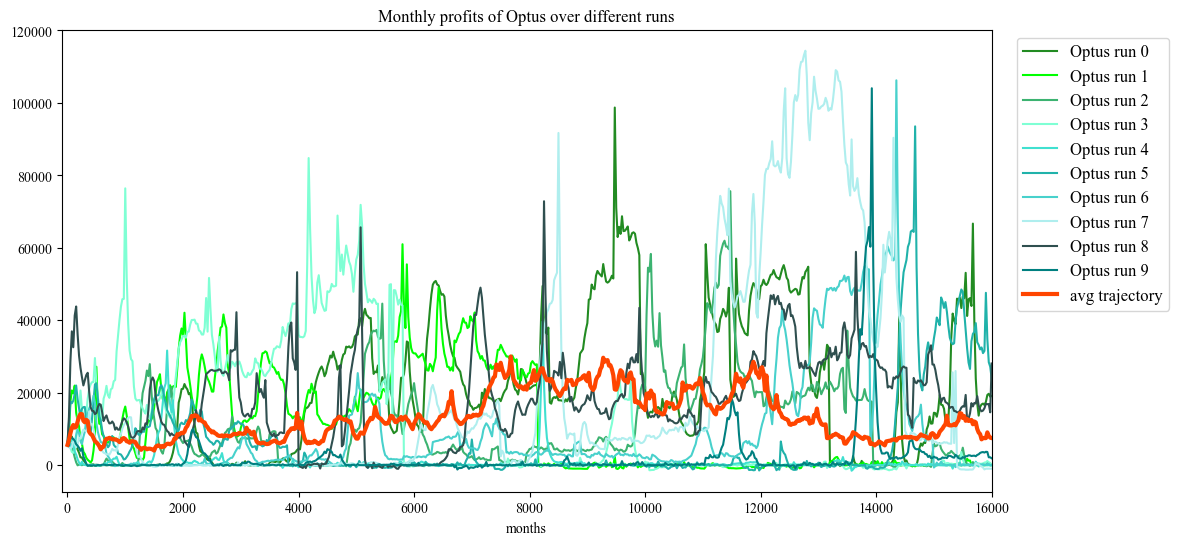

In [36]:
def graph_profits_multi_run(vector, isp, MaxIter):
    isp_profits = all_profies
    plt.figure(figsize=(12, 6))
    x = []
    for i in range(MaxIter):
        if i%25 == 0:
            x.append(i)
            
    ISP_names = ["Telstra", "TPG", "Optus", "Vodafone", "Dodo", "Aussie Broadband", "iiNet", "SkyMesh", "Activ8Me", "Tangerine", "Kogan", "Exetel", "Bendigo Telco", "Superloop", "ipstar", "Moose Mobile" ]
    colours = ["forestgreen", "lime", "mediumseagreen", "aquamarine", "turquoise", "lightseagreen", "mediumturquoise","paleturquoise", "darkslategray", "teal", "darkcyan", "c", "cyan", "darkturquoise", "cadetblue", "powderblue", "lightblue"]
    for isp_i in range(len(ISP_names)):
        if ISP_names[isp_i] == isp:
            i = isp_i
    
    for run in range(len(isp_profits[10:20])):
        plt.plot(x, isp_profits[run][i], label=ISP_names[i] + f" run {run}", color=colours[run])
        
    avg_trajectory = []
    for t in range(len(x)):
        avg_at_t = 0
        for run in isp_profits[10:20]:  
            avg_at_t += run[i][t]
        avg_at_t = avg_at_t / len(isp_profits[:10])
        avg_trajectory.append(avg_at_t)
    plt.plot(x, avg_trajectory, label="avg trajectory", color="orangered", linewidth=3)
    
    
    plt.title(f"Monthly profits of {isp} over different runs")
    plt.legend(bbox_to_anchor=(1.2, 1), loc="upper right", fontsize=12)
    plt.xlabel("months")
    plt.xlim(-100, MaxIter)
    #plt.ylim(-10, 160000)
    plt.show()

graph_profits_multi_run(vector, "Optus", MaxIter)



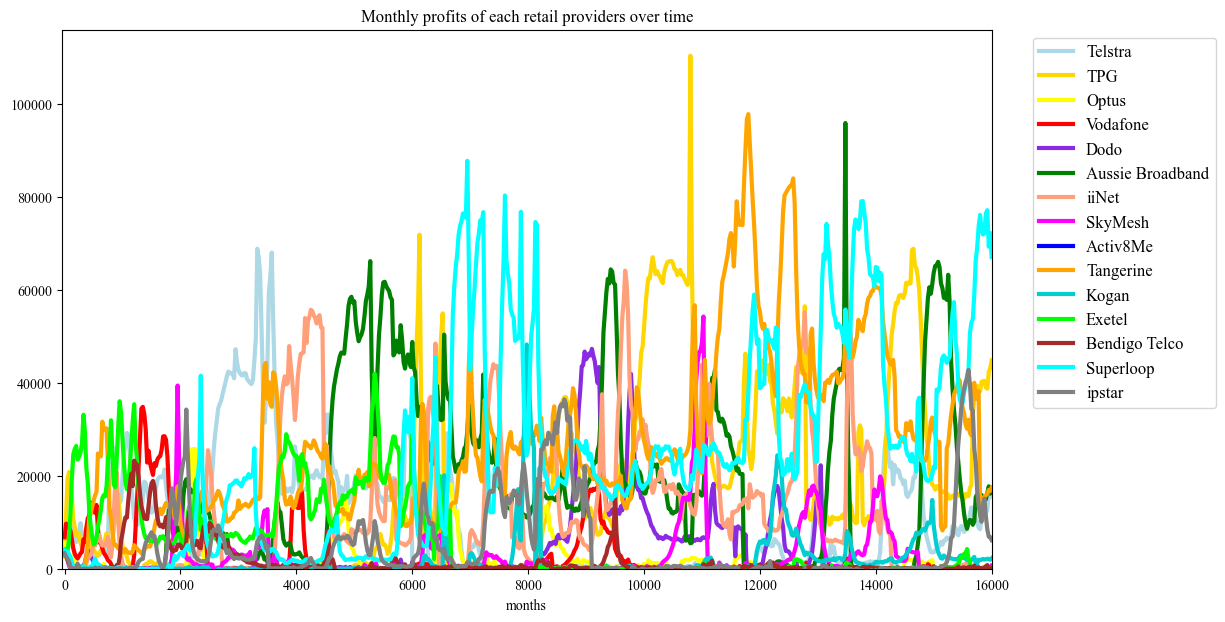

In [67]:
profies = get_specific_data(vector, 0, num_runs)[13]
graph_profit(vector, MaxIter)

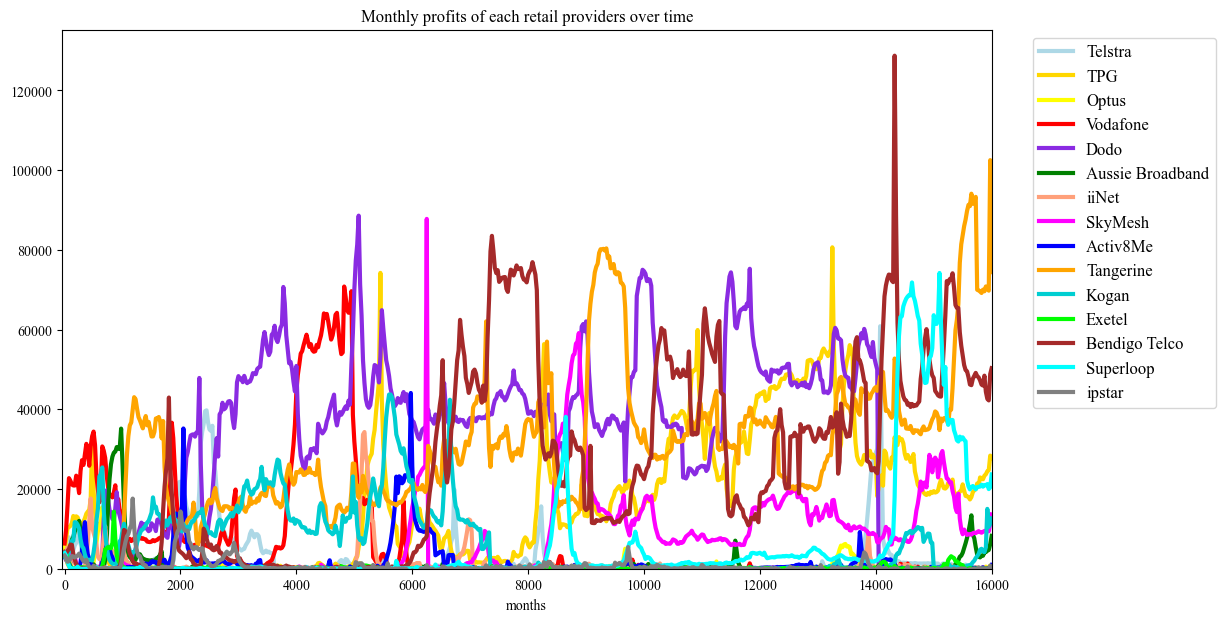

In [68]:
profies = get_specific_data(vector, 0, num_runs)[38]
graph_profit(vector, MaxIter)

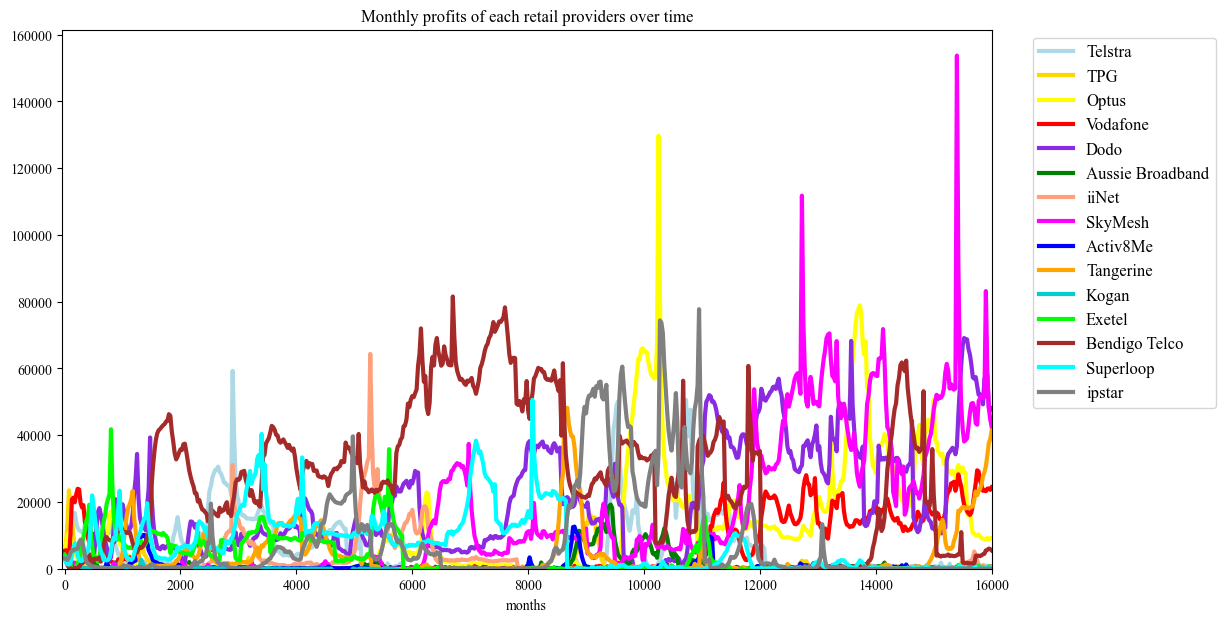

In [69]:
profies = get_specific_data(vector, 0, num_runs)[22]
graph_profit(vector, MaxIter)

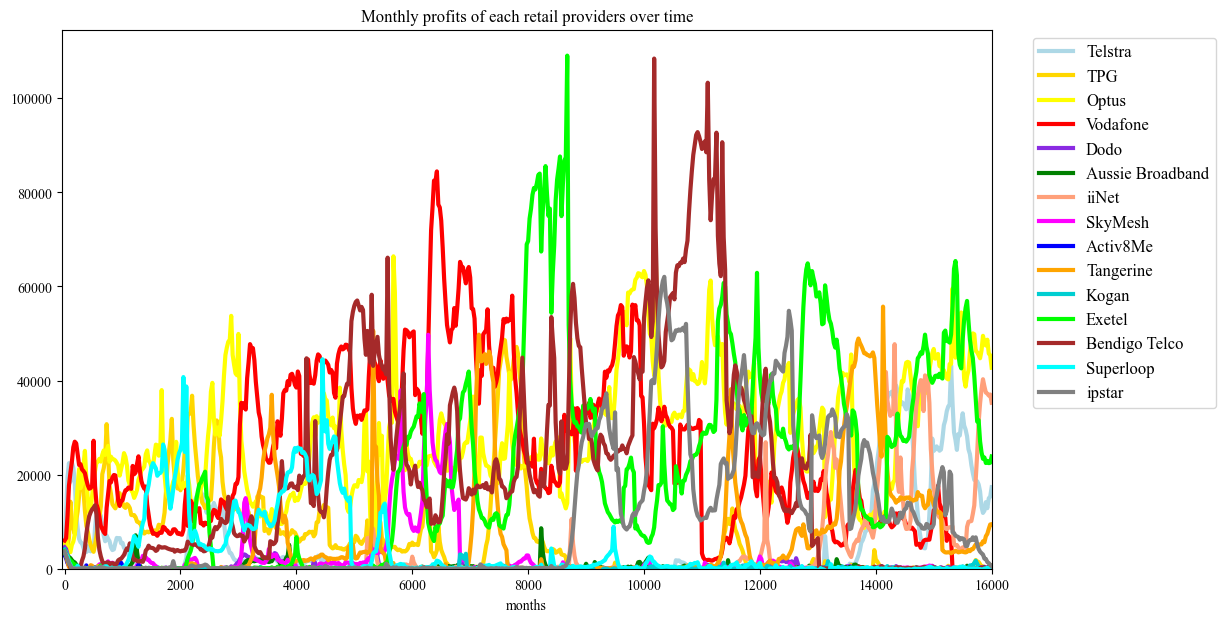

In [70]:
profies = get_specific_data(vector, 0, num_runs)[29]
graph_profit(vector, MaxIter)

In [71]:
profies = get_specific_data(vector, 0, num_runs)[33=4]
graph_profit(vector, MaxIter)

SyntaxError: invalid syntax (4192005785.py, line 1)

In [59]:
def graph_aff_by_quint_over_time(vector, MaxIter, setting):
    aff_by_quint = quinties
    populations = pops
    x = []
    for i in range(MaxIter):
        if i%25 == 0:
            x.append(i)
            
    plt.figure(figsize=(6, 4))

            
    colours = ["red", "coral", "deepskyblue", "blue"]
    labels = ["under 2%", "under 5%", 'over 5%', "over 10%"]
                 
    if setting[0] == 0:
        
        for aff_level in range(4):
            high_line = [[] for _ in range(6)]
            mean_line = [[] for _ in range(6)]
            low_line = [[] for _ in range(6)]       
            for t in range(len(x)):
                for q in range(5):
                    vals = []
                    total = 0
                    
                    for run_index in range(len(aff_by_quint)):
                        run = aff_by_quint[run_index]
                        if aff_level == 4:
                            total += (run[t][q][aff_level] + run[t][q][5] + run[t][q][6])
                            vals.append(run[t][q][aff_level] + run[t][q][5] + run[t][q][6])
                        else:
                            total += run[t][q][aff_level]
                            vals.append(run[t][q][aff_level])
                    
                    mean = total / len(aff_by_quint)
                    std_dev = np.std(vals)
                    mean_norm = mean / (populations[run_index] / 5) * 100
                    high_norm = (mean + std_dev) / (populations[run_index] / 5) * 100
                    low_norm = (mean - std_dev) / (populations[run_index] / 5) * 100
                    mean_line[q].append(mean_norm)
                    high_line[q].append(high_norm)
                    low_line[q].append(low_norm)

            '''plot1.plot(x, mean_line[0], label=labels[aff_level], color=colours[aff_level], linestyle="solid")
            plot2.plot(x, mean_line[1], color=colours[aff_level], linestyle="solid")
            plot3.plot(x, mean_line[2], color=colours[aff_level], linestyle="solid")
            plot4.plot(x, mean_line[3], color=colours[aff_level], linestyle="solid")
            plot5.plot(x, mean_line[4], color=colours[aff_level], linestyle="solid")
            plot1.fill_between(x, high_line[0], low_line[0], color=colours[aff_level], alpha=0.15)
            plot2.fill_between(x, high_line[1], low_line[1], color=colours[aff_level], alpha=0.15)
            plot3.fill_between(x, high_line[2], low_line[2], color=colours[aff_level], alpha=0.15)
            plot4.fill_between(x, high_line[3], low_line[3], color=colours[aff_level], alpha=0.15)
            plot5.fill_between(x, high_line[4], low_line[4], color=colours[aff_level], alpha=0.15)'''
    
    mean_line_6 = [[], [], [], []]
    high_line_6 = [[], [], [], []]
    low_line_6 = [[], [], [], []]
    for t in range(len(x)):
        means = [0, 0, 0, 0]
        stds = [[], [], [], []]
        for run_index in range(len(aff_by_quint)):
            run = aff_by_quint[run_index]
            totals = [0, 0, 0, 0]
            for q in range(5):
                for aff_level in range(3):
                    totals[aff_level] += run[t][q][aff_level]
                totals[3] += run[t][q][3] + run[t][q][4] + run[t][q][5]
            for aff_level in range(4):
                means[aff_level] += totals[aff_level] /populations[run_index] * 100
                stds[aff_level].append(totals[aff_level] /populations[run_index] * 100)
        for aff_level in range(4):
            mean = means[aff_level] / len(aff_by_quint)
            std = np.std(stds[aff_level])
            mean_line_6[aff_level].append(mean)
            high_line_6[aff_level].append(mean + std)
            low_line_6[aff_level].append(mean - std)
    for aff_level in range(4):
        plt.plot(x, mean_line_6[aff_level], label=labels[aff_level], color=colours[aff_level], linestyle="solid")
        plt.fill_between(x, high_line_6[aff_level], low_line_6[aff_level], color=colours[aff_level], alpha=0.15)

    plt.xlim(0, MaxIter)
    plt.ylim(-5, 105)
    #plot1.legend(bbox_to_anchor=(1, 1.35), ncol=4, fontsize=12)
    plt.show()

In [45]:
quinties = get_specific_data(1202, 1, 120)
pops = get_specific_data(1202, 11, 120)
setting = (0,4)
MaxIter = 10001

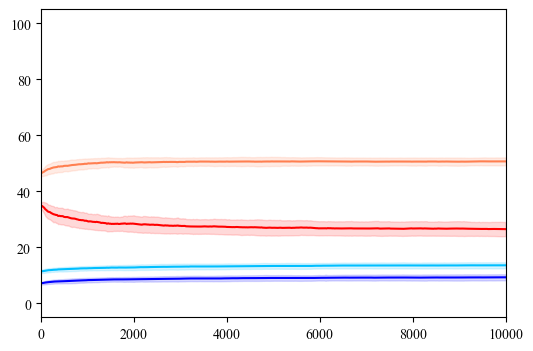

In [49]:
graph_aff_by_quint_over_time(vector, MaxIter, setting)

In [50]:
quinties = get_specific_data(40, 1, 40)
pops = get_specific_data(40, 11, 40)
MaxIter = 16001
setting = (0, 4)

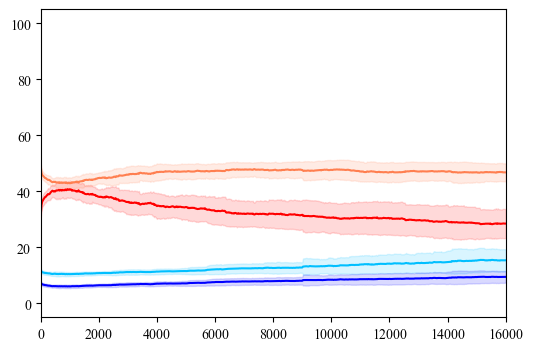

In [51]:

graph_aff_by_quint_over_time(vector, MaxIter, setting)

In [10]:
vector1 = 242
vector2 = 40
MaxIter1 = 10001
MaxIter2 = 16001
num_runs1 = 24
num_runs2 = 40
hhis1 = get_specific_data(vector1, 9, num_runs1)
hhis2 = get_specific_data(vector2, 9, num_runs2)

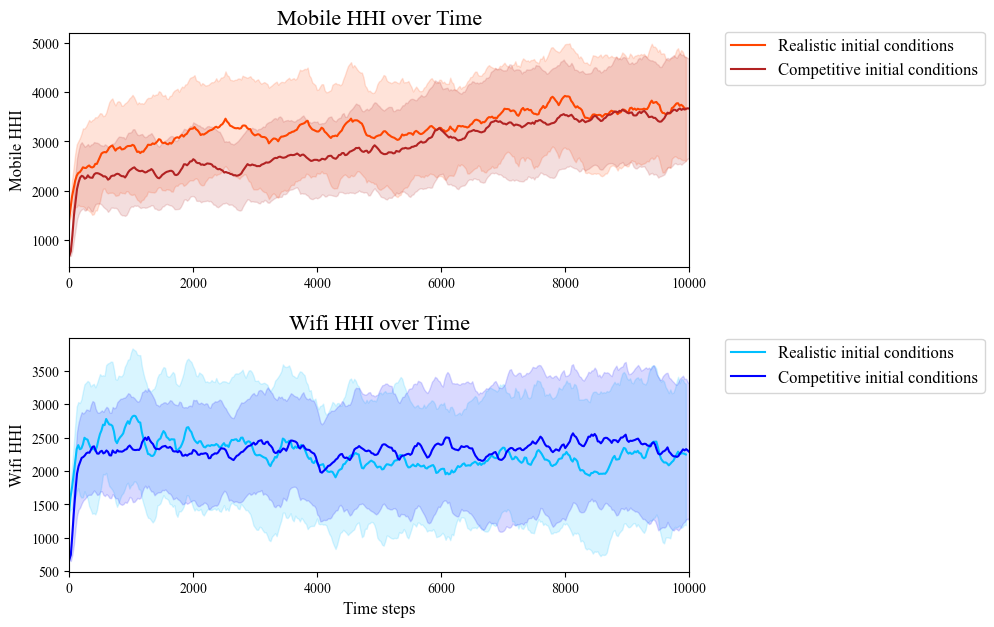

In [14]:
def graph_multi_hhi(hhis1, hhis2, MaxIter):
    plt.figure(figsize=(8, 7))
    plot1 = plt.subplot2grid((9, 1), (0, 0), rowspan=4, colspan=1)
    plot2 = plt.subplot2grid((9, 1), (5, 0), rowspan=4, colspan=1)
    x = []
    for i in range(MaxIter):
        if i%25 == 0:
            x.append(i)
            
    mobile_means = []
    mobile_upper = []
    mobile_lower = []
    wifi_means = []
    wifi_upper = []
    wifi_lower = []
    for t in range(len(x)):
        mobile_mean = 0
        mobile_std_devs = []
        wifi_mean = 0
        wifi_std_devs = []
        for run in hhis1:
            mobile_mean += run[t][0]
            wifi_mean += run[t][1]
            mobile_std_devs.append(run[t][0])
            wifi_std_devs.append(run[t][0])
        mobile_mean = mobile_mean/len(hhis1)
        wifi_mean = wifi_mean/len(hhis1)
        mobile_std_dev = np.std(mobile_std_devs)
        wifi_std_dev = np.std(wifi_std_devs)
        
        mobile_means.append(mobile_mean)
        mobile_upper.append(mobile_mean + mobile_std_dev)
        mobile_lower.append(mobile_mean - mobile_std_dev)
        wifi_means.append(wifi_mean)
        wifi_upper.append(wifi_mean + wifi_std_dev)
        wifi_lower.append(wifi_mean - wifi_std_dev)
    
    #plot 1 - mobile
    plot1.plot(np.array(x)-55, mobile_means, color="orangered", label="Realistic initial conditions", linestyle="solid")
    plot1.fill_between(np.array(x)-55, mobile_lower, mobile_upper, color="orangered", alpha=0.15)
    
    #plot 2 - wifi 
    plot2.plot(np.array(x)-55, wifi_means, color="deepskyblue", label="Realistic initial conditions", linestyle="solid")
    plot2.fill_between(np.array(x)-55, wifi_lower, wifi_upper, color="deepskyblue", alpha=0.15)

    
    mobile_means = []
    mobile_upper = []
    mobile_lower = []
    wifi_means = []
    wifi_upper = []
    wifi_lower = []
    for t in range(len(x)):
        mobile_mean = 0
        mobile_std_devs = []
        wifi_mean = 0
        wifi_std_devs = []
        for run in hhis2:
            mobile_mean += run[t][0]
            wifi_mean += run[t][1]
            mobile_std_devs.append(run[t][0])
            wifi_std_devs.append(run[t][0])
        mobile_mean = mobile_mean/len(hhis2)
        wifi_mean = wifi_mean/len(hhis2)
        mobile_std_dev = np.std(mobile_std_devs)
        wifi_std_dev = np.std(wifi_std_devs)
        
        mobile_means.append(mobile_mean)
        mobile_upper.append(mobile_mean + mobile_std_dev)
        mobile_lower.append(mobile_mean - mobile_std_dev)
        wifi_means.append(wifi_mean)
        wifi_upper.append(wifi_mean + wifi_std_dev)
        wifi_lower.append(wifi_mean - wifi_std_dev)
    
    #plot 1 - mobile
    plot1.plot(x, mobile_means, color="firebrick", label="Competitive initial conditions", linestyle="solid")
    plot1.fill_between(x, mobile_lower, mobile_upper, color="firebrick", alpha=0.15)
    
    #plot 2 - wifi 
    plot2.plot(x, wifi_means, color="blue", label="Competitive initial conditions", linestyle="solid")
    plot2.fill_between(x, wifi_lower, wifi_upper, color="blue", alpha=0.15)


    plot2.set_xlabel("Time steps", fontsize=12)
    plot1.set_ylabel("Mobile HHI", fontsize=12)
    plot2.set_ylabel("Wifi HHI", fontsize=12)
    plot1.set_title("Mobile HHI over Time", fontsize=16)
    plot2.set_title("Wifi HHI over Time", fontsize=16)
    plot1.legend(bbox_to_anchor=(1.49, 1.04), fontsize=12)
    plot2.legend(bbox_to_anchor=(1.49, 1.03), fontsize=12)
    plot1.set_xlim(0, MaxIter)
    plot2.set_xlim(0, MaxIter)
    #plot1.set_ylim(2000, 4000)
    #plot2.set_ylim(2000, 4000)
    plt.show()
    
graph_multi_hhi(hhis1, hhis2, 10001)

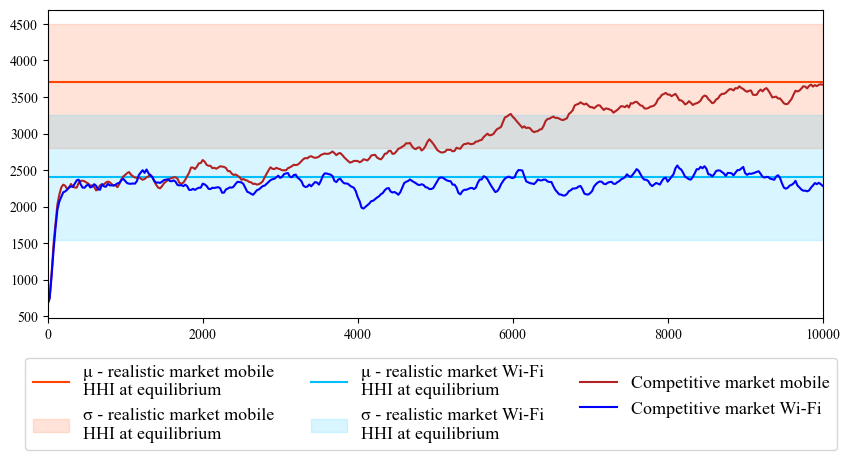

In [69]:
def graph_multi_hhi2(hhis1, hhis2, MaxIter):
    plt.figure(figsize=(10, 4))
    x = []
    for i in range(MaxIter):
        if i%25 == 0:
            x.append(i)
            
    mobile_means = []
    mobile_upper = []
    mobile_lower = []
    wifi_means = []
    wifi_upper = []
    wifi_lower = []
    for t in range(len(x)):
        mobile_mean = 0
        mobile_std_devs = []
        wifi_mean = 0
        wifi_std_devs = []
        for run in hhis1:
            mobile_mean += run[t][0]
            wifi_mean += run[t][1]
            mobile_std_devs.append(run[t][0])
            wifi_std_devs.append(run[t][0])
        mobile_mean = mobile_mean/len(hhis1)
        wifi_mean = wifi_mean/len(hhis1)
        mobile_std_dev = np.std(mobile_std_devs)
        wifi_std_dev = np.std(wifi_std_devs)
        
        mobile_means.append(mobile_mean)
        mobile_upper.append(mobile_mean + mobile_std_dev)
        mobile_lower.append(mobile_mean - mobile_std_dev)
        wifi_means.append(wifi_mean)
        wifi_upper.append(wifi_mean + wifi_std_dev)
        wifi_lower.append(wifi_mean - wifi_std_dev)
    
    #plot 1 - mobile
    plt.plot(x, [3700 for _ in range(len(x))], color="orangered", label="μ - realistic market mobile\nHHI at equilibrium", linestyle="solid")
    plt.fill_between(x, 2800, 4500, color="orangered", label="σ - realistic market mobile\nHHI at equilibrium", alpha=0.15)
    
    #plot 2 - wifi 
    plt.plot(x, [2400 for _ in range(len(x))], color="deepskyblue", label="μ - realistic market Wi-Fi\nHHI at equilibrium", linestyle="solid")
    plt.fill_between(x, 1550, 3250, color="deepskyblue", label="σ - realistic market Wi-Fi\nHHI at equilibrium", alpha=0.15)

    
    mobile_means = []
    mobile_upper = []
    mobile_lower = []
    wifi_means = []
    wifi_upper = []
    wifi_lower = []
    for t in range(len(x)):
        mobile_mean = 0
        mobile_std_devs = []
        wifi_mean = 0
        wifi_std_devs = []
        for run in hhis2:
            mobile_mean += run[t][0]
            wifi_mean += run[t][1]
            mobile_std_devs.append(run[t][0])
            wifi_std_devs.append(run[t][0])
        mobile_mean = mobile_mean/len(hhis2)
        wifi_mean = wifi_mean/len(hhis2)
        mobile_std_dev = np.std(mobile_std_devs)
        wifi_std_dev = np.std(wifi_std_devs)
        
        mobile_means.append(mobile_mean)
        mobile_upper.append(mobile_mean + mobile_std_dev)
        mobile_lower.append(mobile_mean - mobile_std_dev)
        wifi_means.append(wifi_mean)
        wifi_upper.append(wifi_mean + wifi_std_dev)
        wifi_lower.append(wifi_mean - wifi_std_dev)
    
    #plot 1 - mobile
    plt.plot(x, mobile_means, color="firebrick", label="Competitive market mobile", linestyle="solid")
    #plt.fill_between(x, mobile_lower, mobile_upper, color="firebrick", alpha=0.15)
    
    #plot 2 - wifi 
    plt.plot(x, wifi_means, color="blue", label="Competitive market Wi-Fi", linestyle="solid")
    #plt.fill_between(x, wifi_lower, wifi_upper, color="blue", alpha=0.15)
    
    plt.legend(bbox_to_anchor=(1.03, -0.1), ncol=3, fontsize=13)
    plt.xlim(0, MaxIter)
    #plot1.set_ylim(2000, 4000)
    #plot2.set_ylim(2000, 4000)
    plt.show()
    
graph_multi_hhi2(hhis1, hhis2, 10001)